In [1]:
%%capture
!pip install pandas==1.4.4 --quiet

In [2]:
# Standard Libraries
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.express as px
from math import radians, sin, cos, asin, sqrt

# Data Profiling
from ydata_profiling import ProfileReport

# About Olist

![image.png](https://dataviz.etublogs.usj.edu.lb/files/2020/12/Cover1-1024x447.png)

Olist is a leading e-commerce service that connects merchants to main marketplaces in Brazil.  
They provide a wide range of offers including inventory management, dealing with reviews and customer contacts to logistic services.

Olist charges sellers a monthly fee. This fee is progressive with the volume of orders.

----

Here are the seller and customer workflows:

**Seller:**

- Seller joins Olist
- Seller uploads products catalogue
- Seller gets notified when a product is sold
- Seller hands over an item to the logistic carrier  

👉 Note that multiple sellers can be involved in one customer order!

**Customer:**

- Browses products on the marketplace
- Purchases products from Olist.store
- Gets an expected date for delivery
- Receives the order
- Leaves a review about the order  

👉 A review can be left as soon as the order is sent, meaning that a customer can leave a review for a product he did not receive yet!

# Objective of this Notebook

I will analyze a dataset provided by an e-commerce marketplace called Olist to answer the CEO’s (hypothetical) question:

🤔 **How could Olist increase its profit?**

# 1) Data Preparation using Python Classes
I created python classes that handle the logic of data cleaning for the analysis.  
They can be found in the `scripts.py` file in the [input section](https://www.kaggle.com/code/jarisfenner96/olist-e-commerce-analysis-maximize-profit/input) of this notebook.

In [3]:
sys.path.append('/kaggle/input/data-prep-scripts/')
from scripts import Olist, Order, Seller

olist_instance = Olist()
order_instance = Order()
seller_instance = Seller()

## 1.1) Class: Olist
Main method:
- `get_data`: Returns all Olist datasets as DataFrames within a Python dictionary.

```python
data = { 
    'sellers': DataFrame1,
    'orders': DataFrame2,
    ...
    }
```

## 1.2) Class: Order
Main method:

- `get_training_data:` Returns a DataFrame with:
    - `order_id` (unique)
    - `wait_time`
    - `expected_wait_time`
    - `delay_vs_expected`
    - `order_status`
    - `dim_is_five_star`
    - `dim_is_one_star`
    - `review_score`
    - `number_of_products`
    - `number_of_sellers`
    - `price`
    - `freight_value`
    - `distance_seller_customer`

## 1.3) Class: Seller
Main method:
- `get_training_data`: Returns a DataFrame with:
   - `seller_id` (unique)
   - `seller_city`
   - `seller_state`
   - `delay_to_carrier`
   - `wait_time`
   - `date_first_sale`
   - `date_last_sale`
   - `months_on_olist`
   - `share_of_one_stars`
   - `share_of_five_stars`
   - `review_score`
   - `cost_of_reviews`
   - `n_orders`
   - `quantity`
   - `quantity_per_order`
   - `sales`
   - `revenue`
   - `profit`

# 2) Exploratory Analysis
Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- from a `seller_id`...
- and leaves a `review_id`...
- all this belonging to an `order_id`

## 2.1) Initializing the Data

⚠️ Please note, I will reinitialize the data for each new analysis, as to avoid using modified datapoints, should there be any.

⚠️ Even though I have already created the classes for `Orders()` and `Sellers()`, I will use the uncleaned versions of the DataFrames for this analysis, as we will investigate in more detail later.

In [4]:
data = olist_instance.get_data()

## 2.2) Automated Exploratory Analysis with [ydata-profiling](https://github.com/ydataai/ydata-profiling)

In [5]:
datasets_to_profile = ['orders', 'products', 'sellers',
                       'customers', 'order_reviews', 'order_items']

In [6]:
# Define the path to the Kaggle output folder
output_folder = '/kaggle/working/ydata_reports'
# Create directory
os.makedirs(output_folder, exist_ok=True)

# Check if the files exist before running the loop
files_exist = all([os.path.exists(os.path.join(output_folder, f'{d}_report.html')) for d in datasets_to_profile])

# If the files don't exist, then generate the reports
if not files_exist:
    # Loop through datasets and generate reports
    for d in datasets_to_profile:
        print('Exporting: '+ d)
        profile = ProfileReport(data[d], title=d)
        output_file_path = os.path.join(output_folder, f'{d}_report.html')
        profile.to_file(output_file_path)

Exporting: orders


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: products


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: sellers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: customers


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: order_reviews


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Exporting: order_items


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

👆 **The ydata-reports can be found in the [output section](https://www.kaggle.com/code/jarisfenner96/olist-e-commerce-analysis-maximize-profit/output) of the notebook. They contain:**

- `Overview`: General information about the dataset, including the number of rows and columns, variable types, and memory usage.
- `Variables`: Detailed information about each variable, such as its name, type, unique values, and missing values.
- `Correlations`: Correlation matrix and heatmap to visualize the relationships between variables.
- `Missing Values`: Visualization and analysis of missing values in the dataset.
- `Data Types`: Distribution of data types within the dataset.
- `Unique Values`: Summary of unique values for categorical variables.
- `Numeric Statistics`: Descriptive statistics for numeric variables, including mean, median, minimum, maximum, and quartiles.
- `Sample`: Sample of the dataset to provide a glimpse of the data.

## 2.3) Investigating the Cardinalities of the various DataFrames
🤔 **How many unique `orders`, `reviews`, `sellers`, `products` and `customer` are there ?**

In [7]:
aggregates = np.array([
    [
        data["orders"]['order_id'].nunique(),
        data["order_reviews"]['review_id'].nunique(),
        data["sellers"]['seller_id'].nunique(),
        data["products"]['product_id'].nunique(),
        data["customers"]['customer_id'].nunique(),
    ],
    [
        data["orders"]['order_id'].count(),
        data["order_reviews"]['review_id'].count(),
        data["sellers"]['seller_id'].count(),
        data["products"]['product_id'].count(),
        data["customers"]['customer_id'].count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates)).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
             columns=['nunique', 'count'])

,nunique,count
orders,99441,99441
reviews,98410,99224
sellers,3095,3095
products,32951,32951
customers,99441,99441


🤔 **Are there reviews for all orders?**

In [8]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]

orders_reviews = orders.merge(reviews, on='order_id', how='outer')

In [9]:
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

☝️ **Nearly all orders have a review, except 768 out of 100k (less than 0.7% missing)**

🤔 **How many reviews are there per order?**

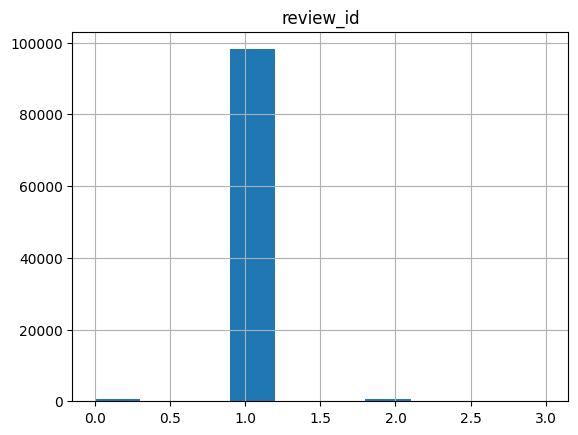

In [10]:
%matplotlib inline
orders_reviews.groupby(["order_id", "customer_id"]).count().hist();

☝️ **Nearly all orders have only one review per customer.**

## 2.4) Reviews and Order Status

🤔 **What does the distribution of the review scores look like?**

Text(0.5, 1.0, 'Distribution of Review Scores')

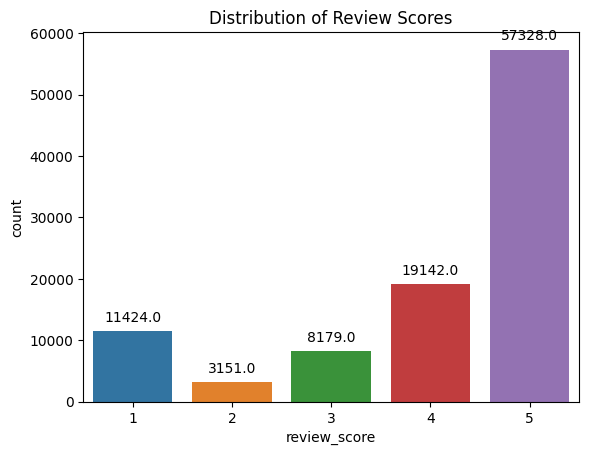

In [11]:
ax = sns.countplot(x='review_score', data=data['order_reviews'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Review Scores')

🤔 **What does the distribution of the order status look like?**

Text(0.5, 1.0, 'Distribution of Order Status')

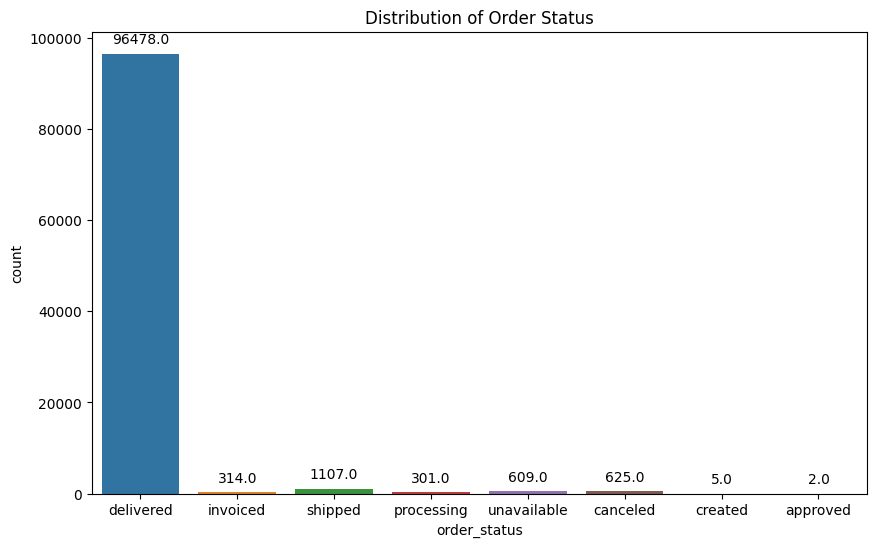

In [12]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = data['orders'], x = 'order_status')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Order Status')

## 2.5) Evolution of Key Business Metrics from February 2017 to September 2018

### Metric 1: Order Numbers

🤔 **How is the business doing on a weekly basis?**



In [13]:
orders = data['orders'].copy()

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders.set_index('order_purchase_timestamp').sort_index()

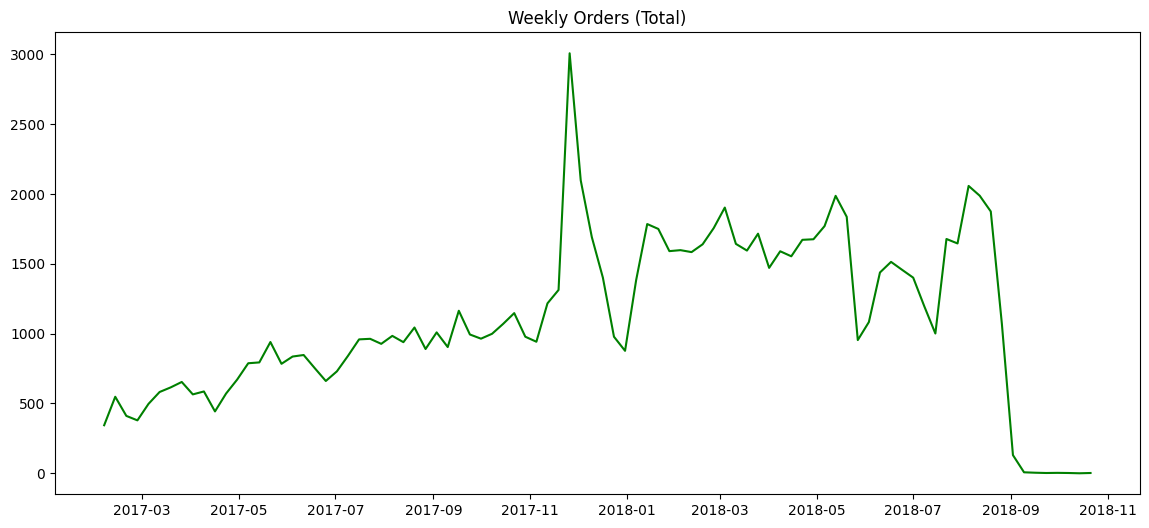

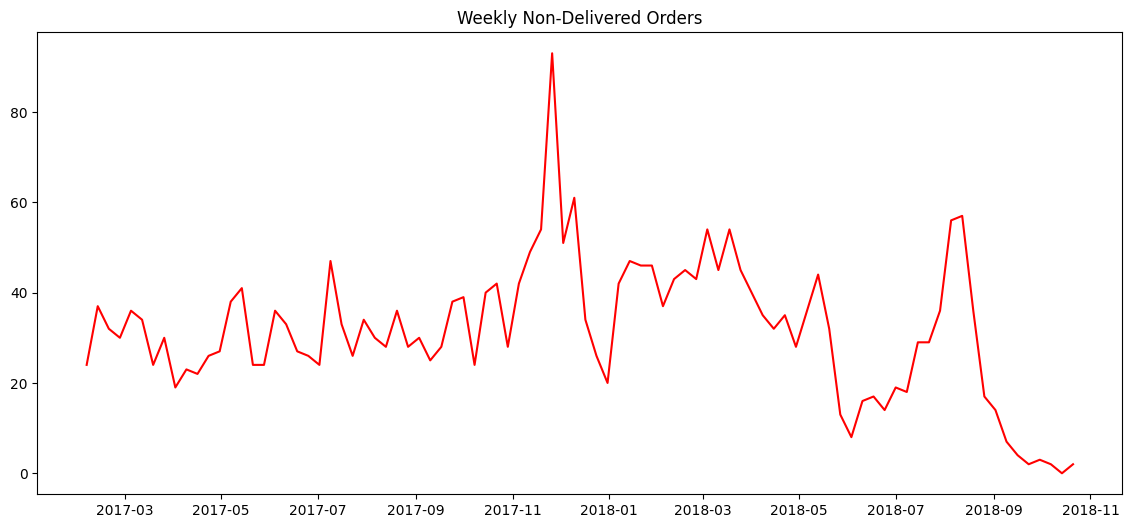

In [14]:
plt.figure(figsize=(14,6))
weekly_orders_total = orders['2017-02-01':].resample('W')['order_id'].count()
plt.plot(weekly_orders_total, color='g')
plt.title('Weekly Orders (Total)')
plt.show()

plt.figure(figsize=(14,6))
non_delivered_orders = orders.query("order_status != 'delivered'").loc['2017-02-01':]
weekly_non_delivered_orders = non_delivered_orders.resample('W')['order_id'].count()
plt.plot(weekly_non_delivered_orders, color='r')
plt.title('Weekly Non-Delivered Orders')
plt.show();

👆 **There seems to be some correlation between the number of orders and number of non-deliveries, but it is not fully conclusive.**

🤔 **What does the visualization of the approximate weekly revenues of Olist look like (weekly sum of `payment_value` in `BRL`)?**

In [15]:
order_ids_payments = data['order_payments'].groupby('order_id').sum()[['payment_value']]
order_ids_payments.rename(columns={'payment_value': 'order_payment_value'}, inplace=True)

orders_payments = data['orders'].merge(order_ids_payments, on='order_id')

In [16]:
for col in ['order_purchase_timestamp', 'order_approved_at', \
            'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    orders_payments[col] = pd.to_datetime(orders_payments[col])
orders_payments.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12


In [17]:
weekly_orders_payments = orders_payments.set_index('order_purchase_timestamp').sort_index()['2017-02-01':].resample('W')

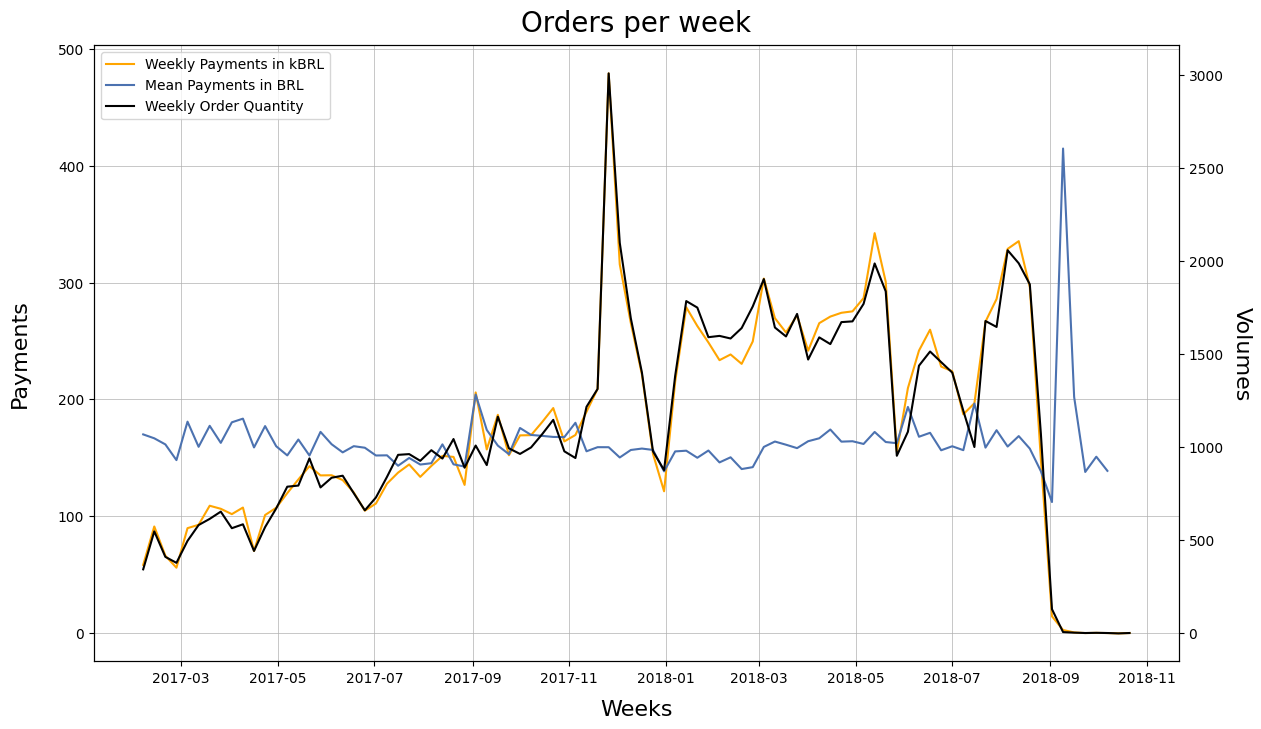

In [18]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(14,8))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Weekly payments and Mean Payments
    ax1.plot(weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000),
             color="orange",
             label="Weekly Payments in kBRL")
    ax1.plot(weekly_orders_payments.mean()['order_payment_value'],
             label="Mean Payments in BRL")
    ax1.set_xlabel("Weeks",
                   fontsize = 16,
                   labelpad = 10)
    ax1.set_ylabel("Payments",
                   fontsize = 16,
                   labelpad = 20)

    # Weekly Order Quantity
    ax2.plot(weekly_orders_payments.count()['order_id'],
             label="Weekly Order Quantity",
             c="black")
    ax2.set_ylabel("Volumes",
                   fontsize = 16,
                   rotation = 90*3,
                   labelpad = 20)

    # Legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    # Title
    ax1.set_title('Orders per week',
                  fontsize = 20,
                  pad = 10)

    # Grid
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)
    plt.show();

### Metric 2: Customer Satisfaction

🤔 **How does the customer satisfaction evolve on a monthly basis?**

In [19]:
reviews = data['order_reviews'].copy()
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date', inplace=True)
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp
review_creation_date,,,,,,
2018-01-18,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 21:46:59
2018-03-10,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-11 03:05:13
2018-02-17,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-18 14:36:24


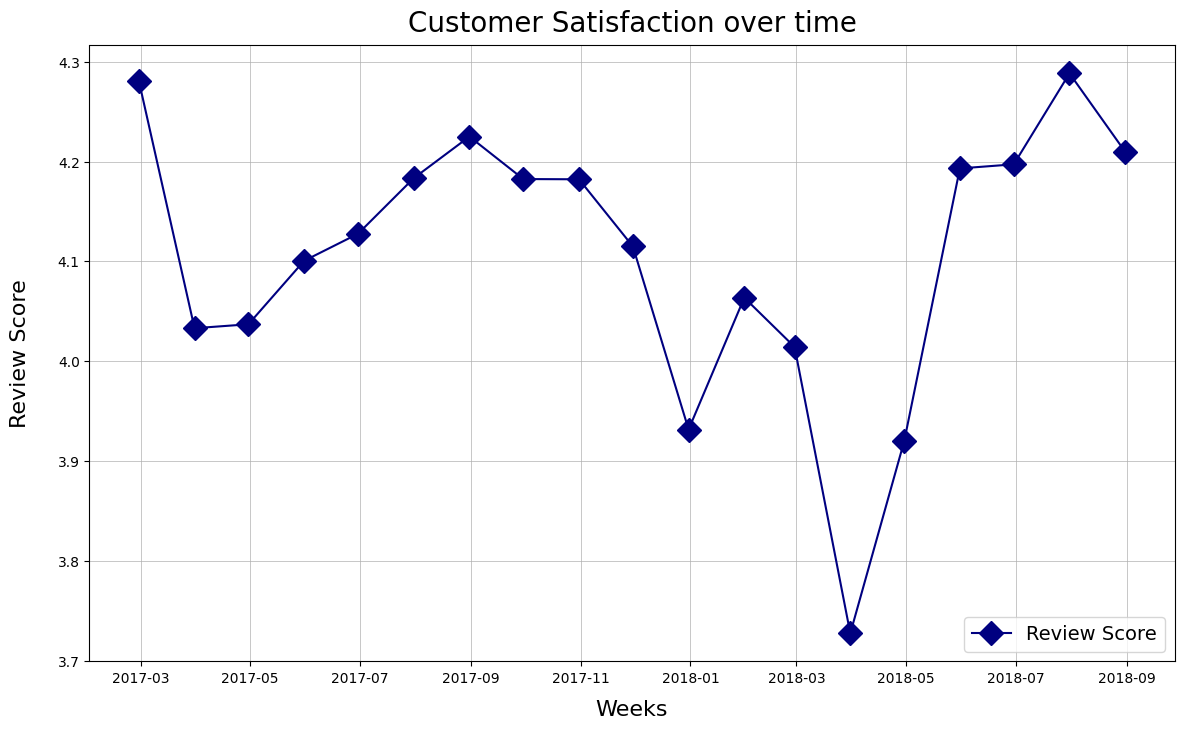

In [20]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(14,8))
    ax = plt.gca()
    
    # Customer Satisfaction over time
    ax.plot(reviews.loc['2017-02-01':].resample('M').agg({'review_score':'mean'}),
            color = "#000080",
            marker = "D",
            markersize = 12,
            label="Review Score")
    ax.set_xlabel("Weeks", fontsize = 16, labelpad = 10)
    ax.set_ylabel("Review Score", fontsize = 16, labelpad = 20)

    # Legend
    ax.legend(loc='lower right', fontsize = 14)

    # Title
    ax.set_title('Customer Satisfaction over time', fontsize = 20, pad = 10)

    # Grid
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    plt.show();

### Metric 3: Shipping Delay

🤔 **Are there trends in the histroical evolution of `delay_vs_expected` and `wait_time` in days?**

In [21]:
orders = orders.query("order_status=='delivered'").reset_index()
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [22]:
orders['delay_vs_expected'] = (orders['order_delivered_customer_date'] -\
                               orders['order_estimated_delivery_date']) / np.timedelta64(24, 'h')

In [23]:
orders['wait_time'] = (orders['order_delivered_customer_date'] -\
                       orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')

In [24]:
orders["was_late"] = orders['delay_vs_expected'].map(lambda x: x > 0)
orders["early_or_on_time"] = orders["was_late"].map({True:"late",False:"in_time"})

In [25]:
orders["early_or_on_time"].value_counts()

in_time    88652
late        7826
Name: early_or_on_time, dtype: int64

In [26]:
round(orders["early_or_on_time"].value_counts(normalize = True),2)

in_time    0.92
late       0.08
Name: early_or_on_time, dtype: float64

👆 **On average, 8% of orders are delivered after the ETA.**  

🤔 **Are some weeks worse than others?**

In [27]:
delay_analysis_per_week = orders.set_index('order_purchase_timestamp').resample('W').agg({
    'delay_vs_expected':np.mean,
    'wait_time':np.mean,
    'was_late':np.sum,
    'order_id':'count'})

delay_analysis_per_week.columns = ['avg_delay_vs_exp', 'avg_wait_time','no_of_delays', 'no_of_orders']

delay_analysis_per_week['pct_of_lateness'] = delay_analysis_per_week['no_of_delays'] / delay_analysis_per_week['no_of_orders']
delay_analysis_per_week = delay_analysis_per_week.sort_index()['2017-02-01':]

print("-"*40)
print("Delay Analysis per week")
print("-"*40)
display(round(delay_analysis_per_week.tail(10),2))

----------------------------------------
Delay Analysis per week
----------------------------------------


,avg_delay_vs_exp,avg_wait_time,no_of_delays,no_of_orders,pct_of_lateness
order_purchase_timestamp,,,,,
2018-07-01,-16.78,8.33,10,1382,0.01
2018-07-08,-13.84,8.52,19,1178,0.02
2018-07-15,-9.88,11.27,59,972,0.06
2018-07-22,-10.40,9.03,65,1649,0.04
2018-07-29,-9.92,8.32,63,1610,0.04
2018-08-05,-6.57,8.66,276,2002,0.14
2018-08-12,-7.01,8.49,243,1931,0.13
2018-08-19,-8.52,7.63,133,1839,0.07
2018-08-26,-8.32,5.48,71,1054,0.07


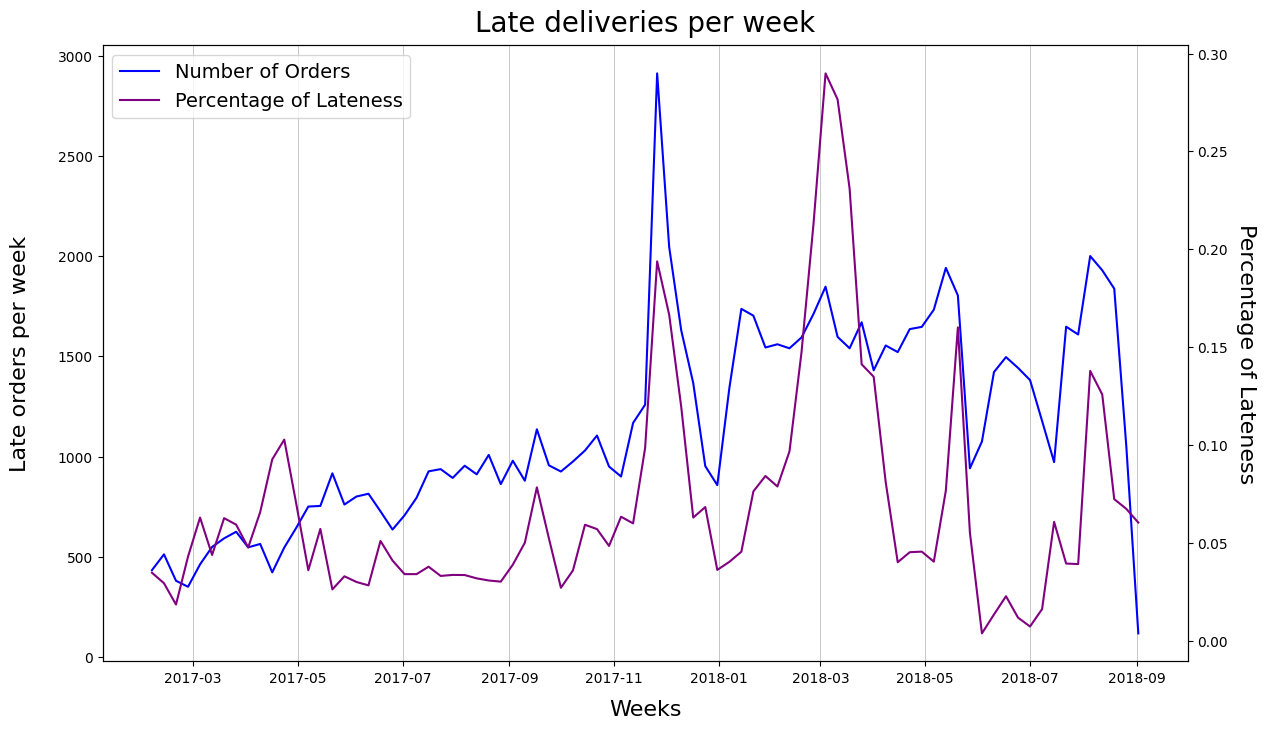

In [28]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(14,8))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Weekly payments and Mean Payments
    ax1.plot(delay_analysis_per_week['no_of_orders'],
             color="blue",
             label="Number of Orders")
    ax1.set_xlabel("Weeks",
                   fontsize = 16,
                   labelpad = 10)
    ax1.set_ylabel("Late orders per week",
                   fontsize = 16,
                   labelpad = 20)

    # Percentage of Lateness
    ax2.plot(delay_analysis_per_week['pct_of_lateness'],
             label="Percentage of Lateness",
             c="purple")
    ax2.set_ylabel("Percentage of Lateness",
                   fontsize = 16,
                   rotation = 90*3,
                   labelpad = 20)

    # Legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize = 14)

    # Title
    ax1.set_title('Late deliveries per week',
                  fontsize = 20,
                  pad = 10)

    # Grid
    ax1.grid(axis="x",linewidth=0.5)
    plt.show()

👆 **Olist experienced major lateness issues during 3-4 weeks.**

🤔 **Deep dive into these peaks: Subgroups to investigate**
- 20% and more
- 15-20%
- 10-15%
- 5-10%
- 5% and less

In [29]:
round(delay_analysis_per_week[['no_of_delays', 'no_of_orders','pct_of_lateness']].sort_values(by = 'pct_of_lateness', ascending = False).head(10),2)

,no_of_delays,no_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2018-03-04,536,1849,0.29
2018-03-11,442,1598,0.28
2018-03-18,356,1541,0.23
2018-02-25,365,1713,0.21
2017-11-26,565,2915,0.19
2017-12-03,341,2047,0.17
2018-05-20,289,1805,0.16
2018-02-18,235,1595,0.15
2018-03-25,236,1671,0.14


In [30]:
lateness_20_and_more = delay_analysis_per_week.query("pct_of_lateness >= 0.20")
display(round(lateness_20_and_more[['no_of_delays', 'no_of_orders','pct_of_lateness']],2))

,no_of_delays,no_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2018-02-25,365,1713,0.21
2018-03-04,536,1849,0.29
2018-03-11,442,1598,0.28
2018-03-18,356,1541,0.23


In [31]:
lateness_15_20 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.15,0.20)]
display(round(lateness_15_20[['no_of_delays', 'no_of_orders','pct_of_lateness']],2))

,no_of_delays,no_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-11-26,565,2915,0.19
2017-12-03,341,2047,0.17
2018-05-20,289,1805,0.16


In [32]:
lateness_10_15 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.10,0.15)]
display(round(lateness_10_15[['no_of_delays', 'no_of_orders','pct_of_lateness']],2))

,no_of_delays,no_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-04-23,56,545,0.10
2017-12-10,195,1631,0.12
2018-02-18,235,1595,0.15
2018-03-25,236,1671,0.14
2018-04-01,193,1431,0.13
2018-08-05,276,2002,0.14
2018-08-12,243,1931,0.13


In [33]:
lateness_05_10 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.05,0.10)]

In [34]:
lateness_05_and_less = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.00,0.05)]
display(round(lateness_05_and_less[['no_of_delays', 'no_of_orders','pct_of_lateness']],2))

,no_of_delays,no_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-02-05,15,432,0.03
2017-02-12,15,511,0.03
2017-02-19,7,379,0.02
2017-02-26,15,349,0.04
2017-03-12,24,548,0.04
2017-04-02,26,546,0.05
2017-05-07,27,750,0.04
2017-05-21,24,916,0.03
2017-05-28,25,760,0.03


In [35]:
lateness_brackets = pd.Series([
    " ≥ 20%",
    "15% - 20%",
    "10% - 15%",
    "5% - 10%",
    " ≤ 5%"
])

lateness_numbers = pd.Series([
    lateness_20_and_more.shape[0],
    lateness_15_20.shape[0],
    lateness_10_15.shape[0],
    lateness_05_10.shape[0],
    lateness_05_and_less.shape[0]

])

lateness_df = pd.concat([lateness_brackets,lateness_numbers],axis = 1)
lateness_df.columns = ['brackets', 'no_weeks']

display(lateness_df)

,brackets,no_weeks
0,≥ 20%,4
1,15% - 20%,3
2,10% - 15%,7
3,5% - 10%,29
4,≤ 5%,40


In [36]:
print(f"Total Number of Weeks investigated: {np.sum(lateness_df['no_weeks'])}")

Total Number of Weeks investigated: 83


⚠️⚠️⚠️ **Among these 83 weeks, Olist encountered serious troubles** ⚠️⚠️⚠️
* There were 4 weeks during which more than 20% of the orders were delivered later than expected
* There were 3 weeks during which more than 15-20% of the orders were delivered later than expected
* there were 7 weeks during which more than 10-15% of the orders were delivered later than expected

# 3) Olist's Net Promoter Score (NPS)

The **Net Promoter Score (NPS)** of a service answers the following question:

> How likely is it that you would recommend our company/product/service to a friend or colleague?

For a service rated between 1 and 5 stars, like Olist, we can **classify customers into three categories** based on their answers:
- ✅ **Promoters**: customers who answered  with a score of 5
- 😴 **Passive**: customers who answered with a score of 4 
- 😡 **Detractors**: customers who answered with a score between 1 and 3 (inclusive)

<br>

👉 NPS is computed by subtracting the percentage of customers who are **detractors** from the percentage of customers who are **promoters**. The score can range between -100 and 100, where a negative score means that the number of Dectractors outweighs the Promoters, and the other way around.

> NPS  
= % Promoters - % Detractors   
= (# Promoter - # Detractors) / # Reviews  
= (# 5 stars - # <4 stars) / # Reviews

## 3.1) Initializing the Data

In [37]:
orders = order_instance.get_training_data()

## 3.2) Computing the overall NPS Score of Olist

- `review_score` is **5** 👉 `nps_class` is **1** (promoter)
- `review_score` is **4** 👉 `nps_class` is **0** (passive)
- `review_score` is **3** or less 👉 `nps_class` is **-1** (detractor)

In [38]:
orders['promoter_score'] = orders['review_score'].apply(lambda x: 1 if x == 5 else (0 if x == 4 else -1))
nps = orders['promoter_score'].mean()

print(f'NPS = {nps*100:.1f}')

NPS = 38.1


👆 **Olist has a slightly positive Net Promoter Score, indicating that the overall customer satisfaction is acceptable, but not perfect.**

# 4) Simple Order Analysis

My goal is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

## 4.1) Initializing the Data

In [39]:
orders = order_instance.get_training_data(with_distance_seller_customer=True)

## 4.2) Inspecting Features

👀 **Printing summary statistics of each column of the order dataset**

In [40]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000
mean,12.513442,23.739059,0.753349,0.592112,0.097651,4.155509,1.141783,1.013914,136.692876,22.749945,600.673668
std,9.454868,8.766518,4.656587,0.491445,0.296844,1.285113,0.535848,0.123635,207.672996,21.517061,594.818600
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000,0.000000
25%,6.754850,18.326979,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.820000,187.199770
50%,10.203727,23.230556,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,85.990000,17.160000,433.943032
75%,15.659560,28.414525,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,23.990000,797.505559
max,208.351759,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000,8736.947618


In [41]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95872 entries, 0 to 95879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  95872 non-null  object 
 1   wait_time                 95872 non-null  float64
 2   expected_wait_time        95872 non-null  float64
 3   delay_vs_expected         95872 non-null  float64
 4   order_status              95872 non-null  object 
 5   dim_is_five_star          95872 non-null  int64  
 6   dim_is_one_star           95872 non-null  int64  
 7   review_score              95872 non-null  int64  
 8   number_of_products        95872 non-null  int64  
 9   number_of_sellers         95872 non-null  int64  
 10  price                     95872 non-null  float64
 11  freight_value             95872 non-null  float64
 12  distance_seller_customer  95872 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 10.2+ MB


👀 **Plotting histograms to get a sense of the distribution of each numerical feature**

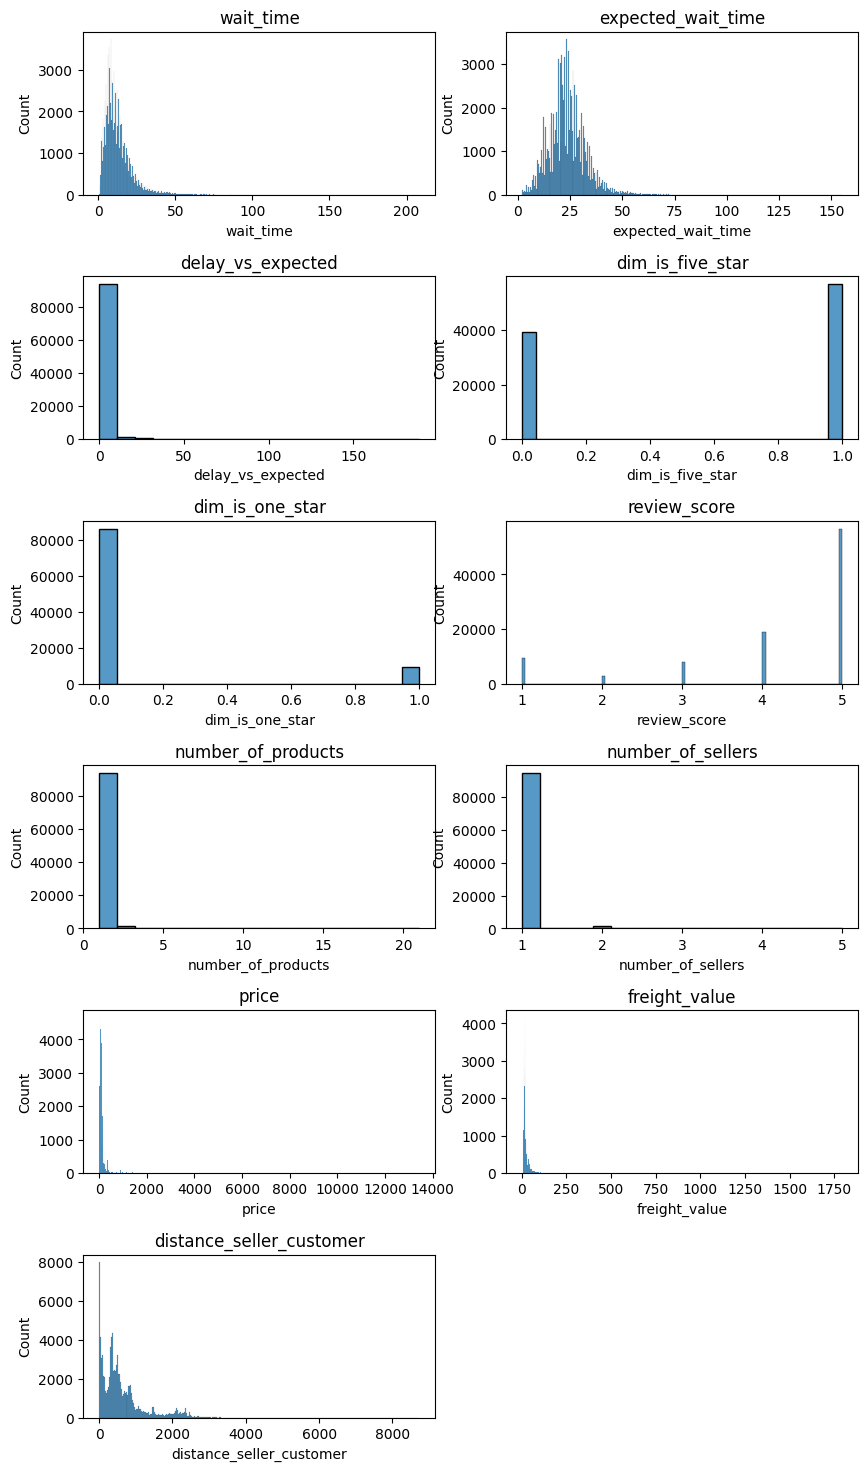

In [42]:
# Select all columns containing only numeric values
orders_numeric = orders.select_dtypes(include = np.number)

num_rows = ((len(orders_numeric.columns) + 1) // 2)
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3 * num_rows))
fig.subplots_adjust(hspace=0.5)

numerical_columns = orders_numeric.columns.tolist()

for i, col in enumerate(numerical_columns):
    sns.histplot(orders_numeric[col], kde=False, ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(col)

# Blank out unused subplots if any
for i in range(len(orders_numeric.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show();

👀 **Creating a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`**

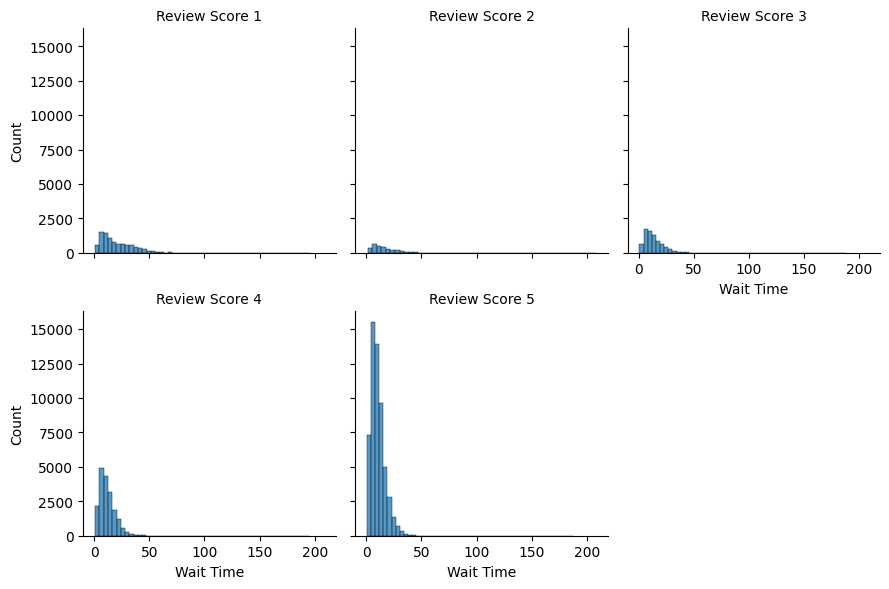

In [43]:
g = sns.FacetGrid(data=orders_numeric, col='review_score', col_wrap=3, height=3)
g.map(sns.histplot, 'wait_time', bins=50, kde=False)

g.set_axis_labels("Wait Time", "Count")
g.set_titles("Review Score {col_name}")

👀 **Creating a `sns.kdeplot()` for `price`, `freight_value` and `distance_seller_customer`**

Text(0.5, 1.0, 'Distribution of Distance Seller-Customer')

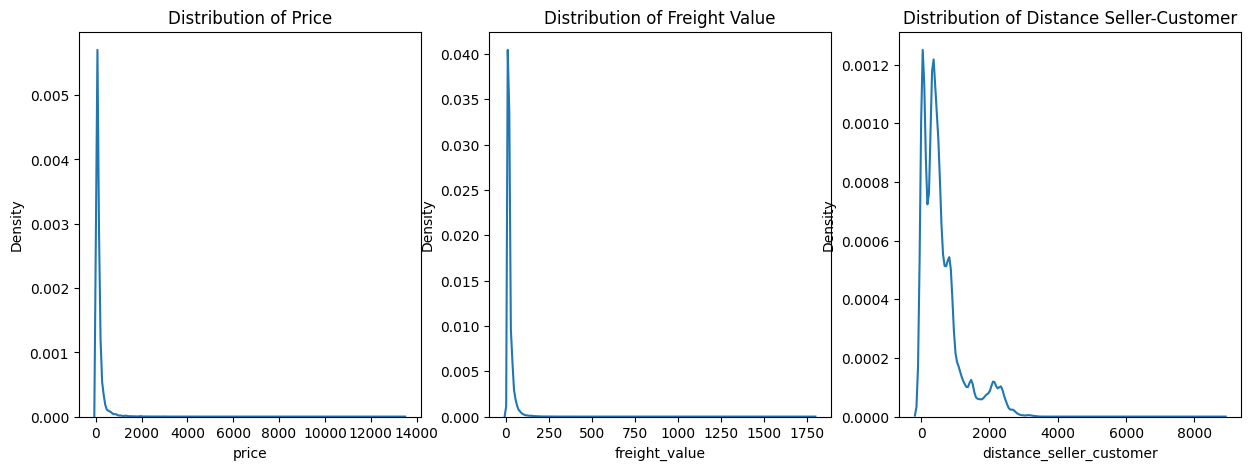

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# KDE Plot for 'price'
sns.kdeplot(orders['price'], ax=axes[0])
axes[0].set_title('Distribution of Price')

# KDE Plot for 'freight_value'
sns.kdeplot(orders['freight_value'], ax=axes[1])
axes[1].set_title('Distribution of Freight Value')

# KDE Plot for 'distance_seller_customer'
sns.kdeplot(orders['distance_seller_customer'], ax=axes[2])
axes[2].set_title('Distribution of Distance Seller-Customer')

🤔 **Which feature seems to the most correlated with `review_score`?**

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

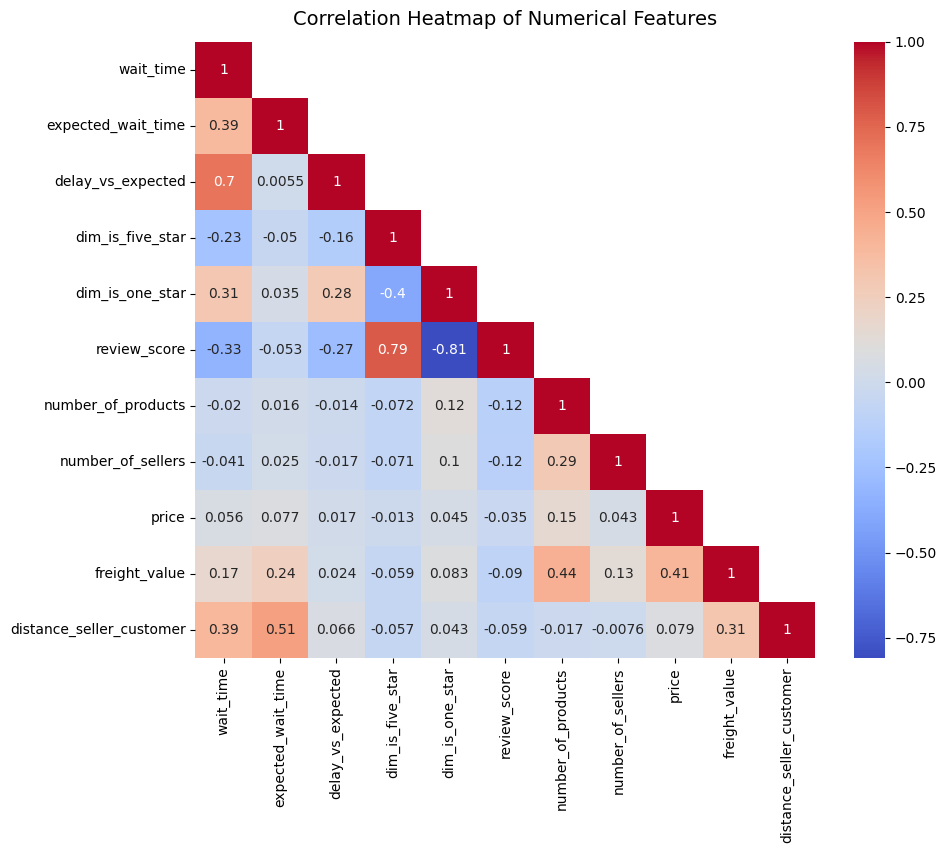

In [45]:
correlation_matrix = orders_numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10}, mask=mask)
heatmap.set_title('Correlation Heatmap of Numerical Features', fontdict={'fontsize': 14}, pad=12)

👆 **Observations:**  
- Review Score strongly correlates to `dim_is_one_star` (-81%) and `dim_is_five_star` (79%). However, this is redundant, as both of these features are based off of the `review_score` in the first place.
- The next two next highest correlation coefficients with respect to the `review_score` are `wait_time` (-33%) and `delay_vs_expected` (-27%).

## 4.3) Regression of `review_score` against Delivery Duration

### 4.3.1) Plots

👀 **Investigating the correlations of `review_score` to `wait_time` and `delay_vs_expected`**

**Notes:**
- Reducing the dataframe to a random sub-sample of 10,000 rows for speed purposes
- Using `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution
- Adding some `y_jitter` to better visualize the scatterplot density
- Limiting `xlim` and `ylim` to hide outliers

(0.0, 5.834513046656491)

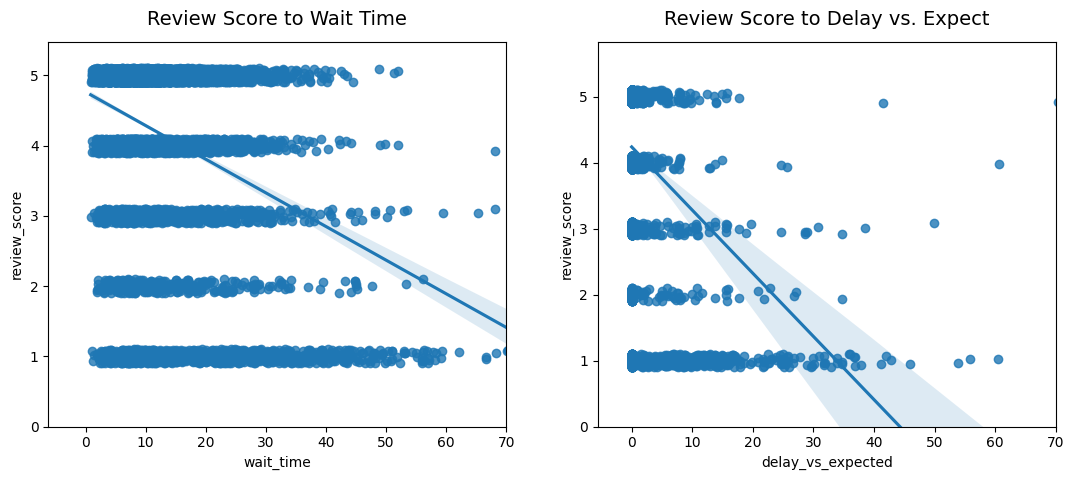

In [46]:
sample = orders.sample(10000, random_state=42)

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(x = sample['wait_time'], y= sample['review_score'], y_jitter=.1).set_title('Review Score to Wait Time', fontdict={'fontsize': 14}, pad=12)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = sample['delay_vs_expected'], y= sample['review_score'], y_jitter=.1).set_title('Review Score to Delay vs. Expect', fontdict={'fontsize': 14}, pad=12)
plt.xlim(right=70)
plt.ylim(bottom=0)

👆 **Observations:**
- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

### 4.3.2) Inferential Analysis

Even if I had used all 100,000 orders for these regplots, **how certain** can I be that these coefficients are **statistically significant**?

🤔 Questions about the statistical significance of these coefficients:

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

👀 I what to estimate the **`confidence interval`** around the mean value for these two slopes:  
- $slope_{\text{wait}} = -0.05 \pm \text{[95% interval]} $  
- $slope_{\text{delay}} = -0.1 \pm \text{[95% interval]} $ 

**Null Hypothesis** $H_0$ : "The delivery time does not influence the review score", a.k.a its coefficient is equal to zero


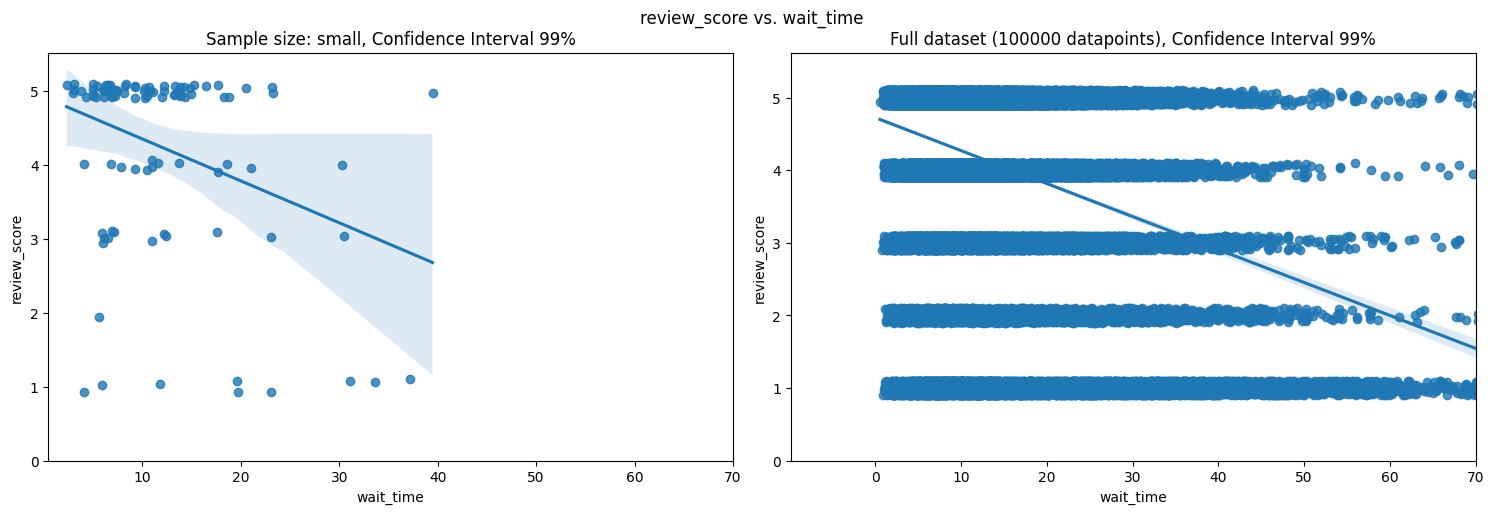

In [47]:
sample = orders.sample(100, random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

fig.suptitle('review_score vs. wait_time')
fig.tight_layout()

sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=99, ax = axes[0])
axes[0].set_xlim(right=70)
axes[0].set_ylim(bottom=0)
axes[0].set_title("Sample size: small, Confidence Interval 99%")


sns.regplot(x = orders.wait_time, y= orders.review_score, y_jitter=.1, ci=99, ax = axes[1])
axes[1].set_xlim(right=70)
axes[1].set_ylim(bottom=0)
axes[1].set_title("Full dataset (100000 datapoints), Confidence Interval 99%")

plt.show();

👆 **Observations:**

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - I am `95% confident that slower deliveries are associated with weaker reviews`.
- The **p-value** associated with the null hypothesis "the impact of delivery time on review scores is almost zero" is lower than 5%
    - I can safely reject the null hypothesis and consider the **alternative hypothesis** = `"The delivery time has an impact on the review score"` 

🔥 My findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can take inherently longer to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review score, no matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

# 5) Improving Olit's Estimated Delivery Time (ETA)

**Estimated Time of Arrival (ETA)** is a key component of modern e-commerce services. It allows companies to manage customer expectations by showing a predicted date for customer delivery.

My goal is to build a predictive model that **estimates the wait time** of an order.

Olist already has its own predictions, found in the variable `expected_wait_time`.

## 5.1) Initializing DataFrame

In [48]:
orders = order_instance.get_training_data(with_distance_seller_customer=True)

## 5.2) Baseline Model - Olit's current ETA Model

🤔 **What's the baseline I want to optimize?**

👆 The delta between Olist' `expected_wait_time` and the real `wait_time`

In [49]:
orders.head(3)

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333


In [50]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95872 entries, 0 to 95879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  95872 non-null  object 
 1   wait_time                 95872 non-null  float64
 2   expected_wait_time        95872 non-null  float64
 3   delay_vs_expected         95872 non-null  float64
 4   order_status              95872 non-null  object 
 5   dim_is_five_star          95872 non-null  int64  
 6   dim_is_one_star           95872 non-null  int64  
 7   review_score              95872 non-null  int64  
 8   number_of_products        95872 non-null  int64  
 9   number_of_sellers         95872 non-null  int64  
 10  price                     95872 non-null  float64
 11  freight_value             95872 non-null  float64
 12  distance_seller_customer  95872 non-null  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 10.2+ MB


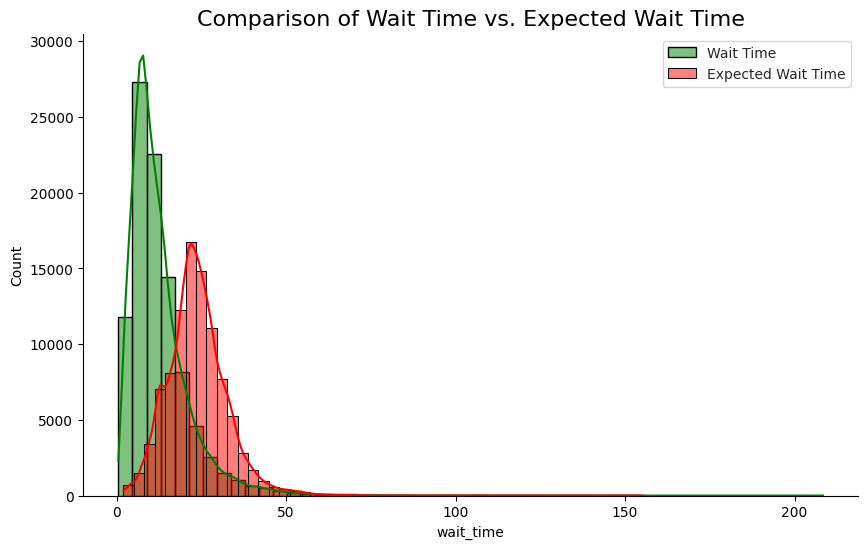

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(orders['wait_time'], bins=50, color='green', kde=True, label='Wait Time')
sns.histplot(orders['expected_wait_time'], bins=50, color='red', kde=True, label='Expected Wait Time')
plt.title('Comparison of Wait Time vs. Expected Wait Time', fontsize=16)

sns.set_style("whitegrid")
sns.despine()
plt.legend()

🤔 **What is the median wait time and the median expected wait time?** 

In [52]:
wait_time_median = orders['wait_time'].median()
expected_wait_time_median = orders['expected_wait_time'].median()

print(f'Wait Time Median:', wait_time_median)
print(f'Expected Wait Time Median:', expected_wait_time_median)

Wait Time Median: 10.203726851851851
Expected Wait Time Median: 23.230555555555554


🤔 **Whats the baseline RMSE?** 

**Note:**  
The errors considered here are the misapproximations from Olist in terms of waiting time.

RMSE = √(Σ(actual - predicted)² / n)

In [53]:
baseline_RMSE = np.sqrt((((orders['wait_time'] - orders['expected_wait_time'])**2)).mean())
print(f'Baseline RMSE:', baseline_RMSE)

Baseline RMSE: 15.110701386210625


## 5.3) OLS Multivatiate Model

I will create an OLS model using the `statsmodel.api.OLS` method this time.

### 5.3.1) Prepare the DataSet with Features `X` and Target `y`

In [54]:
orders.columns

Index(['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected',
       'order_status', 'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_products', 'number_of_sellers', 'price', 'freight_value',
       'distance_seller_customer'],
      dtype='object')

In [55]:
X = orders[[
    'number_of_products',
    'number_of_sellers',
    'price',
    'freight_value',
    'distance_seller_customer'
    ]].copy()

y = orders['wait_time'].copy()

⚖️ Standardizing (`z-score`) each feature of X to compare regression coefficients that will result from the OLS:

In [56]:
X_std = X.copy()

for f in X.columns:
    mu = X[f].mean()
    sigma = X[f].std()
    X_std[f] = X[f].map(lambda x: (x - mu) / sigma)

X_std

,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,-0.264595,-0.112544,-0.513802,-0.652038,-0.979475
1,-0.264595,-0.112544,-0.086640,0.000467,0.429743
2,-0.264595,-0.112544,0.111748,-0.164053,-0.145495
3,-0.264595,-0.112544,-0.441525,0.206815,2.054621
4,-0.264595,-0.112544,-0.562388,-0.652038,-0.959115
...,...,...,...,...,...
95875,-0.264595,-0.112544,-0.311513,-0.449408,-0.893033
95876,-0.264595,-0.112544,0.183977,-0.123156,-0.212797
95877,-0.264595,-0.112544,0.333684,1.964490,0.617630
95878,1.601605,-0.112544,1.075186,2.715522,-0.387558


⚠️ With this `statsmodel.api.OLS`, it's always needed to add a constant "intercept" to the features dataset:

In [57]:
X_std['constant'] = 1
X_std

,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer,constant
0,-0.264595,-0.112544,-0.513802,-0.652038,-0.979475,1
1,-0.264595,-0.112544,-0.086640,0.000467,0.429743,1
2,-0.264595,-0.112544,0.111748,-0.164053,-0.145495,1
3,-0.264595,-0.112544,-0.441525,0.206815,2.054621,1
4,-0.264595,-0.112544,-0.562388,-0.652038,-0.959115,1
...,...,...,...,...,...,...
95875,-0.264595,-0.112544,-0.311513,-0.449408,-0.893033,1
95876,-0.264595,-0.112544,0.183977,-0.123156,-0.212797,1
95877,-0.264595,-0.112544,0.333684,1.964490,0.617630,1
95878,1.601605,-0.112544,1.075186,2.715522,-0.387558,1


### 5.3.2) Running OLS with `statsmodels` and printing `summary`

In [58]:
model = sm.OLS(y, X_std).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wait_time   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     3676.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:04:52   Log-Likelihood:            -3.4301e+05
No. Observations:               95872   AIC:                         6.860e+05
Df Residuals:                   95866   BIC:                         6.861e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
number_of_products          -0.3104      0.033     -9.481      0.000      -0.375      -0.246
number_of_sellers           -0.3557      0.029    -12.174      0.000      -0.413      -0.298
price                        0.0474      0.031      1.542      0.123      -0.013       0.108
freight_value                0.6392      0.036     17.717      0.000       0.568       0.710
distance_seller_customer     3.5219      0.030    117.298      0.000       3.463       3.581
constant                    12.5134      0.028    447.350      0.000      12.459      12.568
==============================================================================
Omnibus:                    91515.661   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10123039.937
Skew:                           4.333   Prob(JB):                         0.00
Kurtosis:                      52.589   Cond. No.                         2.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5.4) Checking the Performance of my OLS Model

🤔 **Who has the better predictions, Olist or me?** 

- Computing my predictions and storing them in `y_pred`

In [59]:
# Olist predictions
y_expected_olist = orders['expected_wait_time']

# Your predictions
y_pred = model.predict(X_std)

# The real waiting times
y_true = orders['wait_time']

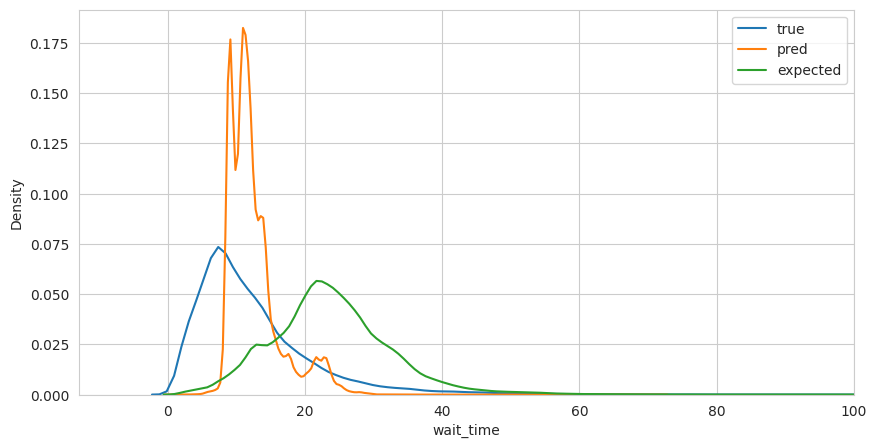

In [60]:
plt.figure(figsize = (10,5))
sns.kdeplot(y_true, label = 'true')
sns.kdeplot(y_pred, label = 'pred')
sns.kdeplot(y_expected_olist, label = 'expected')
plt.xlim(xmax=100)
plt.legend()

In [61]:
residuals = y_pred - y_true
RMSE_pred = np.sqrt((residuals**2).mean())
print(f'My RMSE:', RMSE_pred)

My RMSE: 8.660865913751271


Just as a reminder, Olist's RMSE was equal to :

In [62]:
print(f'Baseline RMSE:', baseline_RMSE)

Baseline RMSE: 15.110701386210625


🤔 **Did I really beat Olist's Data Scientists? I cannot really say that...**

- In many e-commerce and delivery services, the ETA is often overestimated...
- When customers receive their orders earlier than expected, they are more likely to be satisfied.

### Partial Correlations

👀 Visualizing partial correlations with `sm.graphics.plot_partregress_grid`

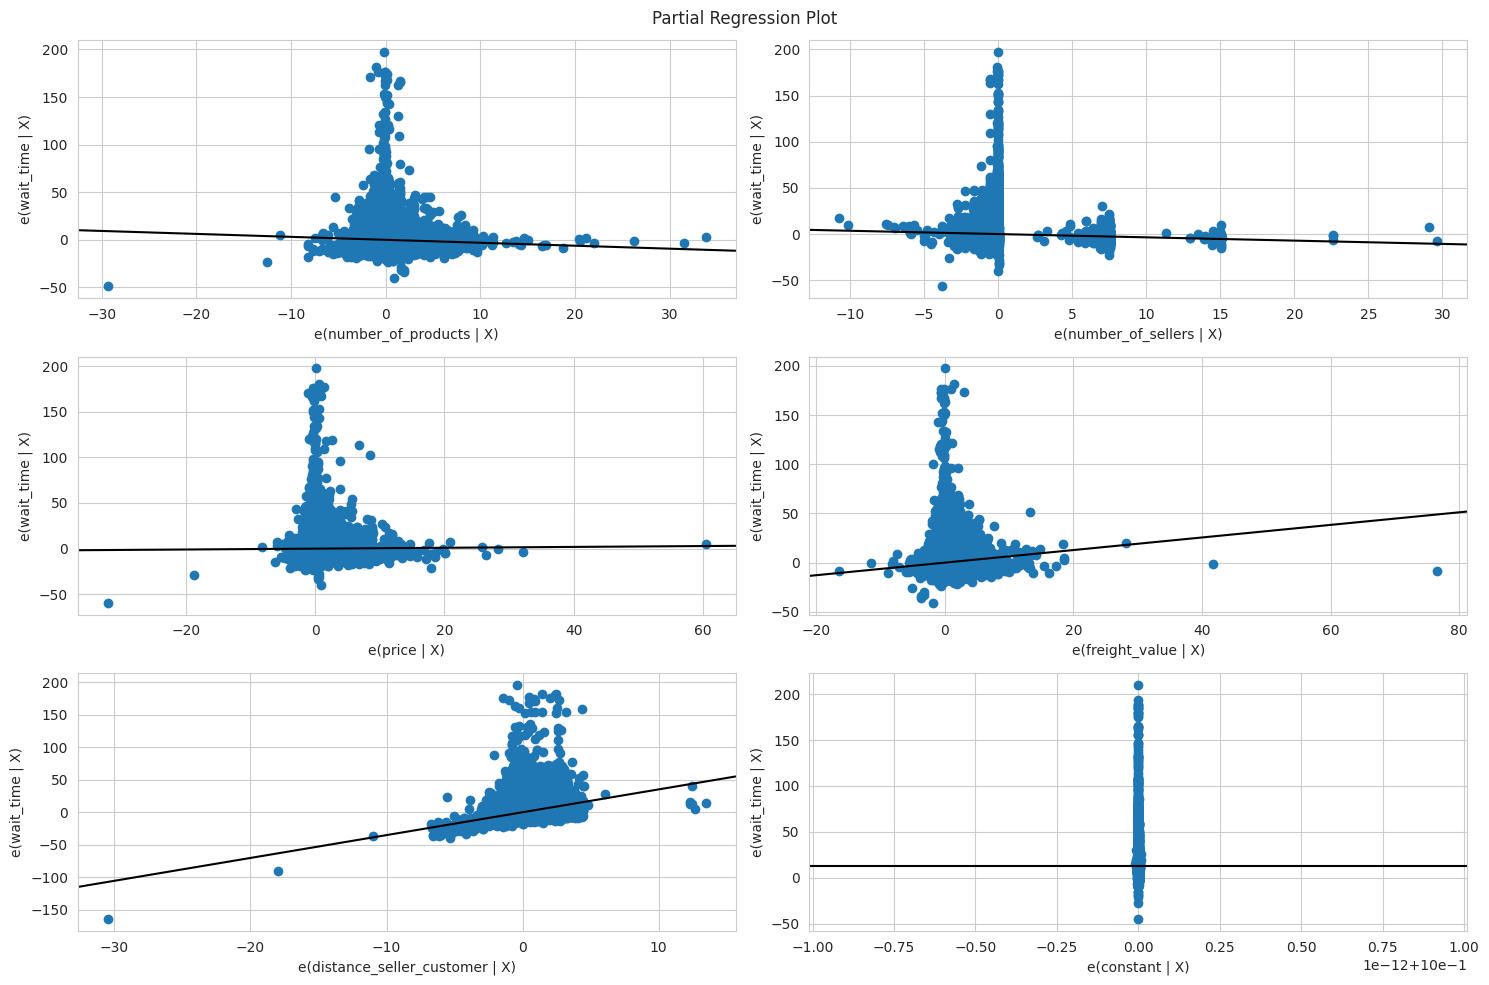

In [63]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show();

**How to read these graphs ?**

👉 Let's focus - for instance - on the graph in the bottom left corner:

<u>Partial regression of `wait_time` against `distance`</u>

- Each point is an order in our dataset


- `y-axis`: residuals of the `wait_time`, using all features except `distance`

    - These residuals contain the remaining information about `wait_time` that couldn't be explained without `distance`


- `x-axis`: residuals of predicting `distance` by using all other features (price, freight_value, etc...)
    - These residuals contain the new information that `distance` brings to the table, which is not already explained by the other features in the model.



### Inferential Conditions

🤔 **Are the residuals normally distributed?**  
If the <span style="color:blue">blue</span> points are aligned on the <span style="color:red">red line</span> which is the identity function, the variable has a Gaussian distribution!

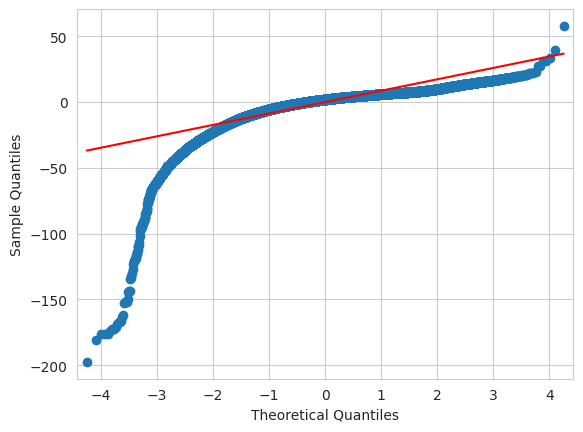

In [64]:
sm.qqplot(residuals, line='s')
plt.show();

# 6) Multivariate Regression of the `review_score`

Let's recall the simple analysis of the Orders: 

Based on the correlation matrix down below, we can notice that `review_score` is mostly correlated to two features: `wait_time` and `delay_vs_expected`.  
However, these two features are also highly correlated to each other.  
  
I will use `statsmodels` to distinguish the effect of one feature, **while holding the other features constant**.

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

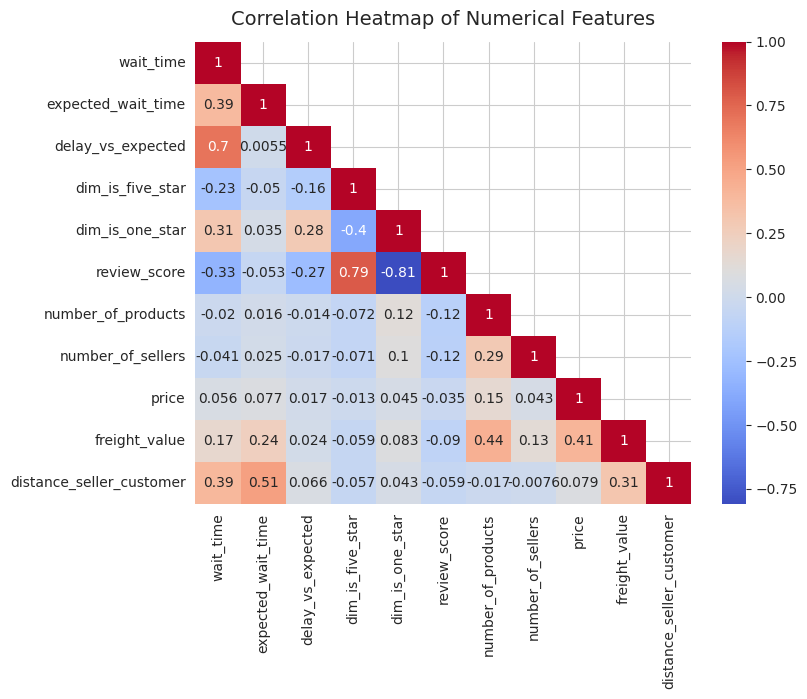

In [65]:
orders = order_instance.get_training_data(with_distance_seller_customer=True)

correlation_matrix = orders.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10}, mask=mask)
heatmap.set_title('Correlation Heatmap of Numerical Features', fontdict={'fontsize': 14}, pad=12)

## 6.1) Unvariate Regression

**Using [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly initialize**
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

### Model 1:

In [66]:
model1 = smf.ols('review_score ~ wait_time', data=orders).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:05:09   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    727.904      0.0

### Model 2:

In [67]:
model2 = smf.ols('review_score ~ delay_vs_expected', data=orders).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:05:09   Log-Likelihood:            -1.5639e+05
No. Observations:               95872   AIC:                         3.128e+05
Df Residuals:                   95870   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2121      0.00

👆 **Observations:**  
- Both models have low **R-squared values**, indicating that the predictors **explain a relatively small proportion** of the variance in the dependent variable.  
- The t-statistics for the **coefficients are highly significant**, suggesting that both predictors have a **statistically significant impact** on the `review score`.

## 6.2) Multivariate Regression

🤔 What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? <br>
🤔 Which of the two features is the most explicative for the low `review_score`?

For that purpose, I will run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable).

### Model 3:

In [68]:
model3 = smf.ols('review_score ~ wait_time + delay_vs_expected', data=orders).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6191.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:05:10   Log-Likelihood:            -1.5426e+05
No. Observations:               95872   AIC:                         3.085e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6502      0.00

👆 **Observations:**
- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`!  
This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors.  

## 6.3) Improve the explainability of the Regression

**Let's try to add more features to our regression to improve the explainability of the regression.**

Creating a new OLS `model4` with more features from the `orders` dataset.
- ⚠️ Avoid **data leaks**: not adding features that are directly derived from the `review_score`
- ⚠️ Avoid adding two features perfectly collinear with each other
- Transforming each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together.  
  Otherwise, the $\beta_i$ won't be in the same dimension, meaning I'll be comparing apples (e.g. `review_stars per day`) with oranges (e.g. `review_stars per BRL`)!
  
**Note:**  
A **`Multivariate Linear Regression`** is also called an **`Ordinary Least Squares`** method because in this model, we want to minimise the **`MSE Mean Squared Errors`**

### Model 4:

In [69]:
features = [
    "wait_time",
    "delay_vs_expected",
    "number_of_products",
    "number_of_sellers",
    "price",
    "freight_value",
    "distance_seller_customer",
]

In [70]:
# Standardizing the features
orders_standardized = orders.copy()
for f in features:
    mu = orders[f].mean()
    sigma = orders[f].std()
    orders_standardized[f] = orders[f].map(lambda x: (x - mu) / sigma)
orders_standardized

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,-0.431192,15.544063,-0.161781,delivered,0,0,4,-0.264595,-0.112544,-0.513802,-0.652038,-0.979475
1,53cdb2fc8bc7dce0b6741e2150273451,0.134174,19.137766,-0.161781,delivered,0,0,4,-0.264595,-0.112544,-0.086640,0.000467,0.429743
2,47770eb9100c2d0c44946d9cf07ec65d,-0.329907,26.639711,-0.161781,delivered,1,0,5,-0.264595,-0.112544,0.111748,-0.164053,-0.145495
3,949d5b44dbf5de918fe9c16f97b45f8a,0.073540,26.188819,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.441525,0.206815,2.054621
4,ad21c59c0840e6cb83a9ceb5573f8159,-1.019535,12.112049,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.562388,-0.652038,-0.959115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,-0.454309,18.587442,-0.161781,delivered,1,0,5,-0.264595,-0.112544,-0.311513,-0.449408,-0.893033
95876,63943bddc261676b46f01ca7ac2f7bd8,1.023841,23.459051,-0.161781,delivered,0,0,4,-0.264595,-0.112544,0.183977,-0.123156,-0.212797
95877,83c1379a015df1e13d02aae0204711ab,1.305780,30.384225,-0.161781,delivered,1,0,5,-0.264595,-0.112544,0.333684,1.964490,0.617630
95878,11c177c8e97725db2631073c19f07b62,0.483664,37.105243,-0.161781,delivered,0,0,2,1.601605,-0.112544,1.075186,2.715522,-0.387558


In [71]:
# Formula for model training
formula = "review_score ~ " + ' + '.join(features)
formula

'review_score ~ wait_time + delay_vs_expected + number_of_products + number_of_sellers + price + freight_value + distance_seller_customer'

In [72]:
model4 = smf.ols(formula = formula, data = orders_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2322.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:05:12   Log-Likelihood:            -1.5258e+05
No. Observations:               95872   AIC:                         3.052e+05
Df Residuals:                   95864   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<Axes: >

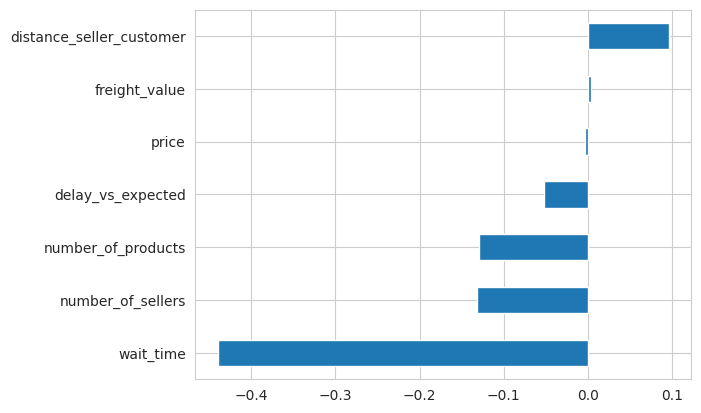

In [73]:
model4.params[1:].sort_values().plot(kind='barh')

👆 **Observations:**  
- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)
- R-squared hasn't increased by much. Most of the explainability of `review_score` lies outside of the orders dataset.

## 6.4) Check Model Performance

⚠️ Regression performance should not be measured only by its R-squared!  

**Computing the residuals as well as visualizing the distribution of the predictions, and especially the residuals.**

In [74]:
predicted_review_score = model4.predict(orders_standardized[features])
residuals = predicted_review_score - orders_standardized.review_score

In [75]:
# Computing the associated RMSE
rmse = (residuals**2).mean()**0.5
rmse

1.1883154116821097

(0.0, 5.9378434631086865)

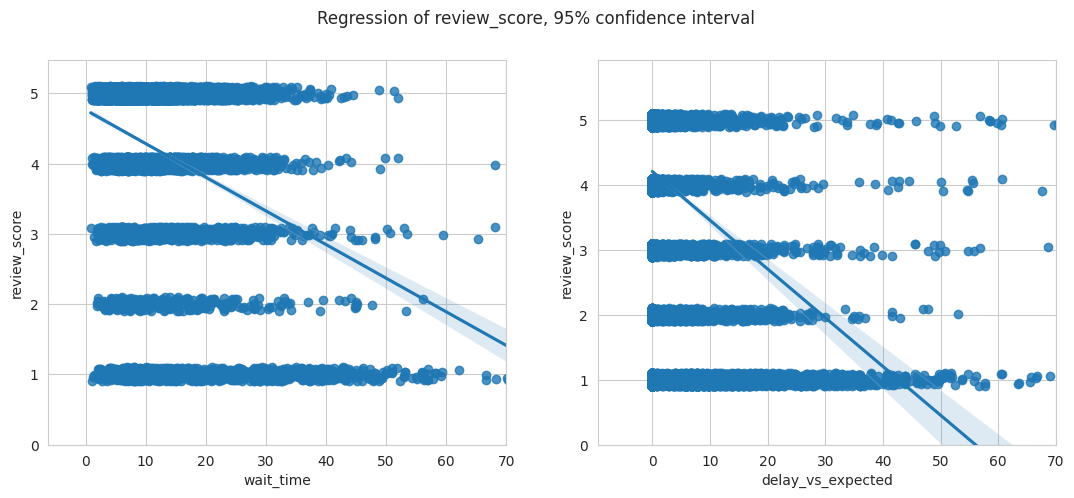

In [76]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

I can see that it is hard to regress the `review_score` of an order vs. its `wait_time`, because the `review_score` is a discrete number that could also be interpreted as a category: 1 (very bad), 2 (bad), 3 (average), 4 (good), 5 (excellent).

☝️ In the end, my model is not so great, for two reasons:
- First, because I don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because I am trying to fit a "linear regression" function to a discrete classification problem

💡 So instead of working on individual orders and trying to explain their discrete `review_score` based on the `wait_time`, I will focus my analysis on the sellers' level, aggregating the orders by sellers.

# 7) Sellers

**My goal is to find sellers who have repeatedly been underperforming vs. others, and understand why.**  
This will help me shape my recommendations about how to improve Olist's profit margin for the future.

To recall, we are using the class `Seller` with a method `Seller().get_training_data` that will return a DataFrame with the following features:
  
| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `seller_id` 	| str 	| the id of the seller **UNIQUE** 	|
| `seller_city` 	| str 	| the city where seller is located 	|
| `seller_state` 	| str 	| the state where seller is located 	|
| `delay_to_carrier` 	| float 	| returns 0 if the order is delivered before the shipping_limit_date, otherwise the value of the delay 	|
| `wait_time` 	| float 	| average wait_time (duration of deliveries) per seller 	|
| `date_first_sale` 	| datetime 	| date of the first sale on Olist 	|
| `date_last_sale` 	| datetime 	| date of the last sale on Olist 	|
| `months_on_olist` 	| float 	| round number of months  on Olist	|
| `n_orders` 	| int 	| number of unique orders the seller was involved with 	|
| `quantity` 	| int 	| total number of items sold by this seller 	|
| `quantity_per_order` 	| float 	| average number of items per order for this seller 	|
| `sales` 	| float 	| total sales associated with this seller (excluding freight value) in BRL 	|  
| `share_of_five_stars` 	| float 	| share of five-star reviews for orders in which the seller was involved 	|
| `share_of_one_stars` 	| float 	| share of one-star reviews for orders in which the seller was involved 	|
| `review_score` 	| float 	| average review score for orders in which the seller was involved 	|

In [77]:
# Removing the cost and profit computation for now
sellers = seller_instance.get_training_data().drop(columns=['cost_of_reviews', 'revenue', 'profit'])
sellers.head(3)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.0,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.0,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.0,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00


## 7.1) Seller's Exploration

## 7.1.1) Plots
🤔 **Are there any outliers?**  
🤔 **What's the median of orders per seller?**  
🤔 **How does the distribution of this variable look like?**

In [78]:
sellers.describe()

,delay_to_carrier,wait_time,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score
count,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
mean,0.385636,12.139417,6.025615,33.650489,37.897203,1.157337,4568.852187,0.120886,0.595077,4.101513
std,2.295812,7.069233,5.994211,107.182856,121.514362,0.439557,14191.836779,0.188857,0.278763,0.801517
min,0.000000,1.214178,0.000000,1.000000,1.000000,1.000000,6.500000,0.000000,0.000000,1.000000
25%,0.000000,8.287658,1.000000,2.000000,3.000000,1.000000,239.850000,0.000000,0.493022,3.846154
50%,0.000000,11.115143,4.000000,7.000000,8.000000,1.000000,896.000000,0.058824,0.600000,4.210526
75%,0.000000,14.231984,10.000000,23.000000,26.000000,1.142857,3583.995000,0.159043,0.750000,4.626453
max,45.434039,189.863160,23.000000,1854.000000,2033.000000,15.000000,229472.630000,1.000000,1.000000,5.000000


In [79]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 2966
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   seller_id            2967 non-null   object        
 1   seller_city          2967 non-null   object        
 2   seller_state         2967 non-null   object        
 3   delay_to_carrier     2967 non-null   float64       
 4   wait_time            2967 non-null   float64       
 5   date_first_sale      2967 non-null   datetime64[ns]
 6   date_last_sale       2967 non-null   datetime64[ns]
 7   months_on_olist      2967 non-null   float64       
 8   n_orders             2967 non-null   int64         
 9   quantity             2967 non-null   int64         
 10  quantity_per_order   2967 non-null   float64       
 11  sales                2967 non-null   float64       
 12  share_of_one_stars   2967 non-null   float64       
 13  share_of_five_stars  2967 non-nul

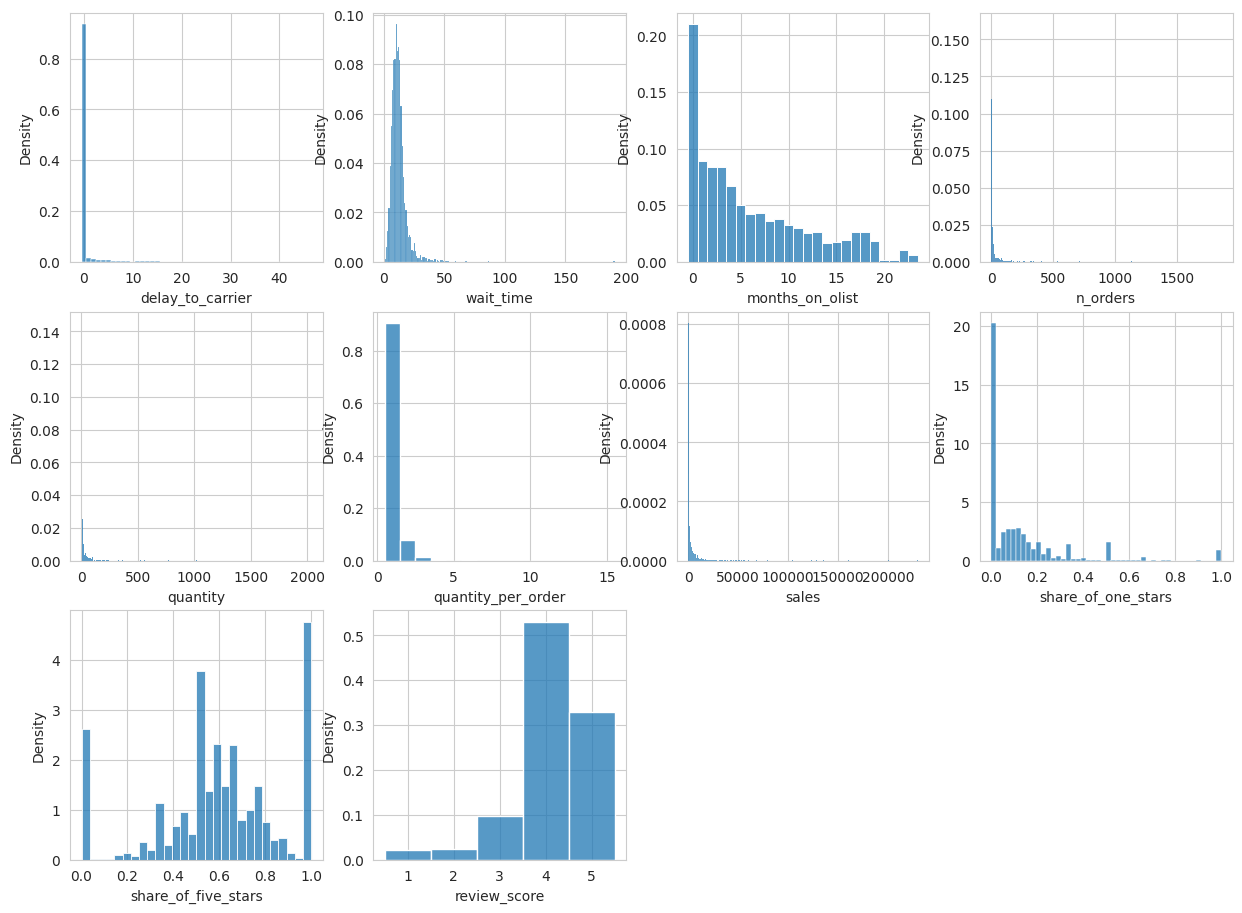

In [80]:
plt.figure(figsize=(15,11))
for (i, col) in enumerate(sellers.describe().columns):#["wait_time", "delay_to_carrier", "avg_review_score", "n_orders", "quantity", "price"]):
    plt.subplot(3,4,i+1)
    sns.histplot(sellers[col], kde=False, stat='density', discrete=[True,None][col in ['share_of_one_stars','share_of_five_stars','sales']]);

👆 **There seems to be a group of sellers which stands out for having very low review scores!** 

In [81]:
fig = px.scatter(data_frame = sellers[sellers['review_score'] < 4],
    x='wait_time',
    y= 'delay_to_carrier',
    size='sales',
    color='review_score',
    size_max=60,
    opacity=0.5
    )

fig.show();

## 7.1.2) Modelling `review_score` with OLS

⚠️ Scatter plots have their limits. 

A more rigorous way to explain **`sellers' review_score`** is to **model the impact of various features on `review_score` with a `multivariate-OLS` in `statsmodels`**.

In [82]:
def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized

In [83]:
features = ['delay_to_carrier', 'wait_time', 'n_orders', 'quantity', 'quantity_per_order', 'sales']
sellers_standardized = standardize(sellers, features)
model = smf.ols(formula=f"review_score ~ {'+ '.join(features)}", data=sellers_standardized).fit()

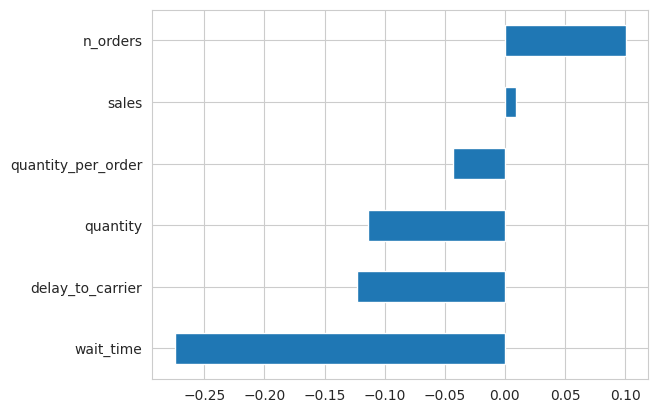

In [84]:
model.params[1:].sort_values().plot(kind='barh');

In [85]:
print('R-squared:', model.rsquared)

R-squared: 0.19430209074601978


🤔 **Comparing the real review scores and the predicted scores by showing them on the same graph.**

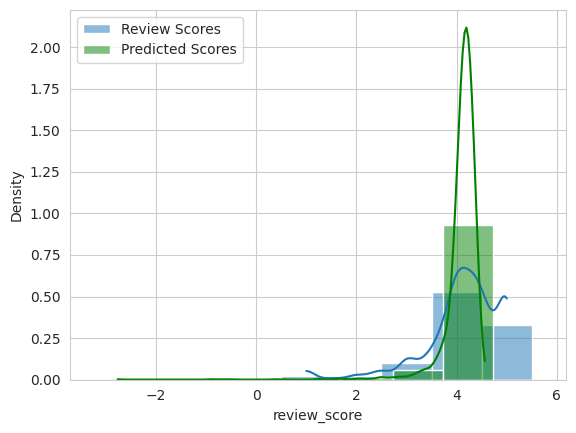

In [86]:
sns.histplot(sellers.review_score, kde=True, stat='density', discrete=True, label='Review Scores')
sns.histplot(model.predict(sellers_standardized[features]), kde=True, stat='density', discrete=True, color='green', label='Predicted Scores')
plt.legend()

🤔 **Plotting the residuals.**

<Axes: ylabel='Density'>

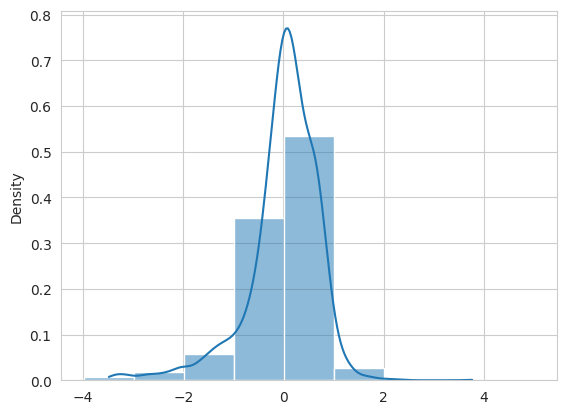

In [87]:
sns.histplot(model.resid, kde=True, stat='density', discrete=True)

## 7.1.3) Adding the `seller_state` to my Analysis

**I haven't used information about `seller_state` yet.**
- Creating a new OLS model regressing `review_score` on only on `seller_states` .
- Analysing the significant features by computing the `significative_coef`
- What are the best states in terms of `review_score`? 

In [88]:
def return_significative_coef(model):
    """
    Returns p_value, lower and upper bound coefficients
    from a statsmodels object.
    """
    # Extract p_values
    p_values = model.pvalues.reset_index()
    p_values.columns = ['variable', 'p_value']

    # Extract coef_int
    coef = model.params.reset_index()
    coef.columns = ['variable', 'coef']

    return p_values.merge(coef,
                          on='variable')\
                   .query("p_value<0.05").sort_values(by='coef',
                                                      ascending=False)

In [89]:
formula = 'review_score ~ C(seller_state)'
model2 = smf.ols(formula=formula, data=sellers).fit()

In [90]:
return_significative_coef(model2).tail()

,variable,p_value,coef
12,C(seller_state)[T.PE],0.034163,1.790505
15,C(seller_state)[T.RJ],0.028171,1.765621
1,C(seller_state)[T.BA],0.032503,1.761685
21,C(seller_state)[T.SP],0.030123,1.739509
3,C(seller_state)[T.DF],0.037168,1.698781


☝️ Some states indeed have _significantly_ better reviews than others on average. 

🤔 Is it due to some lower `quantity_per_order`, lower `wait_time`, or `delay_to_carrier`?  Or is it due to some other factors that we haven't collected data about?

**I will try to isolate the impact of the `seller_state` from the rest by adding other continuous features to my OLS.**

In [91]:
formula = 'review_score ~  sales + quantity + quantity_per_order + C(seller_state)'
model3 = smf.ols(formula=formula, data=sellers).fit()
return_significative_coef(model3).head(5+1)[1:]

,variable,p_value,coef
16,C(seller_state)[T.RN],0.014267,2.149534
4,C(seller_state)[T.ES],0.010618,2.092058
8,C(seller_state)[T.MS],0.025759,1.955813
11,C(seller_state)[T.PB],0.025146,1.936537
9,C(seller_state)[T.MT],0.034190,1.895819


In [92]:
formula = 'review_score ~ wait_time + C(seller_state)'
model4 = smf.ols(formula=formula, data=sellers).fit()
return_significative_coef(model4).head(5+1)[1:]

,variable,p_value,coef
22,wait_time,3.171865e-124,-0.04763


☝️ After adding `wait_time` to my analysis, none of the 22 dummy variables `is_seller_state_xx` are statistically signigicant:

Given the small dataset (most states have a very limited number of sellers):
- I _cannot conclude_ that "some states are inherently better than others for reasons that would be independent of the `wait_time`" 
- In other words, I _cannot reject the hypothesis_ that "seller_state has no impact on review_score, other than through `wait_time`"

# 8) How could Olist increase it's Profit?

## 8.1) Summary of Problem Statement

### Key Findings, so far:

- `wait_time` is the most significant factor behind low review scores  
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`.  
- The latter being outside of Olist's direct control, improving it is not a quick-win recommendation
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments of the bad reviews showed that some were linked to the seller or to the product itself.

### Revenues:
**Sales fees:**  
Olist takes a **10% cut** on the product price (excl. freight) of each order delivered.  
  
**Subscription fees:**  
Olist charges **80 BRL by month** per seller

### Costs:
**Reputation costs**:  
*Estimated* per order with bad reviews (<= 3 stars)  

In the long run, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication.  
I will assume that we have an **estimate measure** of the monetary cost for each bad review:
```python
# review_score: cost in BRL
{'1 star': 100
'2 stars': 50
'3 stars': 40
'4 stars': 0
'5 stars': 0}
```

**IT costs:**  
Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that has ever joined the platform, as well as the square root of the total cumulated number of products that was ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$  

Olist's data team gave me the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both number of sellers to manage and sales transaction impact the cost of the IT systems.  
💡 Square roots reflect scale-effects: IT-systems are often more efficient as they grow bigger.  
💡 Alpha > Beta means that "Olist has a lower IT Cost with few sellers selling a lot of products rather than the other way around: 
- with **1000 sellers** and a total of **100 products** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 products** sold, the total IT cost accumulates to 62,507 BRL

Finally, the IT department also told me that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

## 8.2) Investigating underperforming Sellers

### 8.2.1) Data Preparation

For each `seller_id` I compute, and accumulate since the beginning of Olist:
- the `revenues` the seller brings
- the `review_costs` associated with all the sellers bad reviews
- the resulting `profits` (revenues - costs)

The `get_training_data` method of the Seller() class contains the fields, but until now I used to drop these columns:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
- `profits`: `revenues` - `cost_of_reviews`

In [93]:
sellers = seller_instance.get_training_data()
sellers.head(3)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,revenue,profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.0,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00,140,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.0,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55,240,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.0,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00,0,15.800,15.800


### 8.2.2) Big Picture: Insight into Olist Financials

### Revenues

In [94]:
revenue_sales = sellers['sales'].sum() * 0.1
revenue_subscription = sellers['months_on_olist'].sum() * 80
revenue_total = sellers['revenue'].sum()

print(
    f'''
Sales Cut: {revenue_sales:.2f} BRL
Subscriptions: {revenue_subscription:.2f} BRL
---
Total Revenue: {revenue_total:.2f} BRL
''')


Sales Cut: 1355578.44 BRL
Subscriptions: 1430240.00 BRL
---
Total Revenue: 2785818.44 BRL



### Costs

In [95]:
costs_reviews = sellers['cost_of_reviews'].sum()
costs_it = 500_000
costs_total = costs_reviews + costs_it

print(
    f'''
Review Cost: {costs_reviews:.2f} BRL
IT Cost: {costs_it:.2f} BRL
---
Total Costs: {costs_total:.2f} BRL
''')


Review Cost: 1618210.00 BRL
IT Cost: 500000.00 BRL
---
Total Costs: 2118210.00 BRL



### Profits

In [96]:
# Gross Profit, before IT costs
profits_gross = sellers['profit'].sum()
print(f'Gross Profit (before IT Costs): {profits_gross:.2f} BRL')

Gross Profit (before IT Costs): 1167608.44 BRL


In [97]:
# Gross Profit, after IT costs
profits_net = profits_gross - costs_it
print(f'Gross Profit (after IT Costs): {profits_net:.2f} BRL')

Gross Profit (after IT Costs): 667608.44 BRL


In [98]:
fig = go.Figure(go.Waterfall(
    orientation = "v",
    measure = ["relative", "relative", "total", "relative", "total", "relative", "total"],
    x = ["Monthly subcriptions", "Sales fees", "Total Revenues", "Reviews costs", "Gross Profit", "It costs", "Net Profit"],
    textposition = "outside",
    y = [revenue_subscription, revenue_sales, 0, -costs_reviews, 0,-costs_it, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = {'text': "Olist Profit & Loss (BRL)",
                 'yanchor': 'top',
                 'xanchor': 'left',
                 'xref': 'paper',
                 'font': {'size': 36}},
        showlegend = False
)

fig.show();

### 8.2.3) What is an under-performing Seller?

In [99]:
# Total number of sellers
n_sellers = sellers.shape[0]
# Number of sellers with negative profits
n_negative = sellers.query('profit <= 0').shape[0]
# % of sellers with negative profits
pct_negative = n_negative / n_sellers * 100
# Mean and median of sellers'profits
mean, med = sellers['profit'].mean(), sellers['profit'].median()
# .25 quantile
q25 = sellers['profit'].quantile(q=.25)
n_q25 = sellers.query(f'profit <= {q25}').shape[0]
# Min, Max of sellers'profits
min_, max_ = sellers['profit'].min(), sellers['profit'].max()

In [100]:
print(f"""
👉 There are {n_sellers} sellers on Olist

Insights on the profits they generate for Olist:

👉 {n_negative} ({pct_negative:,.1f}%) of them generate a negative profit.
👉 Profits across sellers from {min_:,.0f} to {max_:,.0f} BRL.
👉 The average profit per seller is {mean:,.2f} BRL.
👉 50% of sellers generate at least a profit of {med:,.2f} BRL.
👉 25% ({n_q25}) of sellers generate a profit inferior to {q25:,.2f} BRL.
""")


👉 There are 2967 sellers on Olist

Insights on the profits they generate for Olist:

👉 376 (12.7%) of them generate a negative profit.
👉 Profits across sellers from -21,520 to 18,068 BRL.
👉 The average profit per seller is 393.53 BRL.
👉 50% of sellers generate at least a profit of 254.37 BRL.
👉 25% (742) of sellers generate a profit inferior to 20.98 BRL.



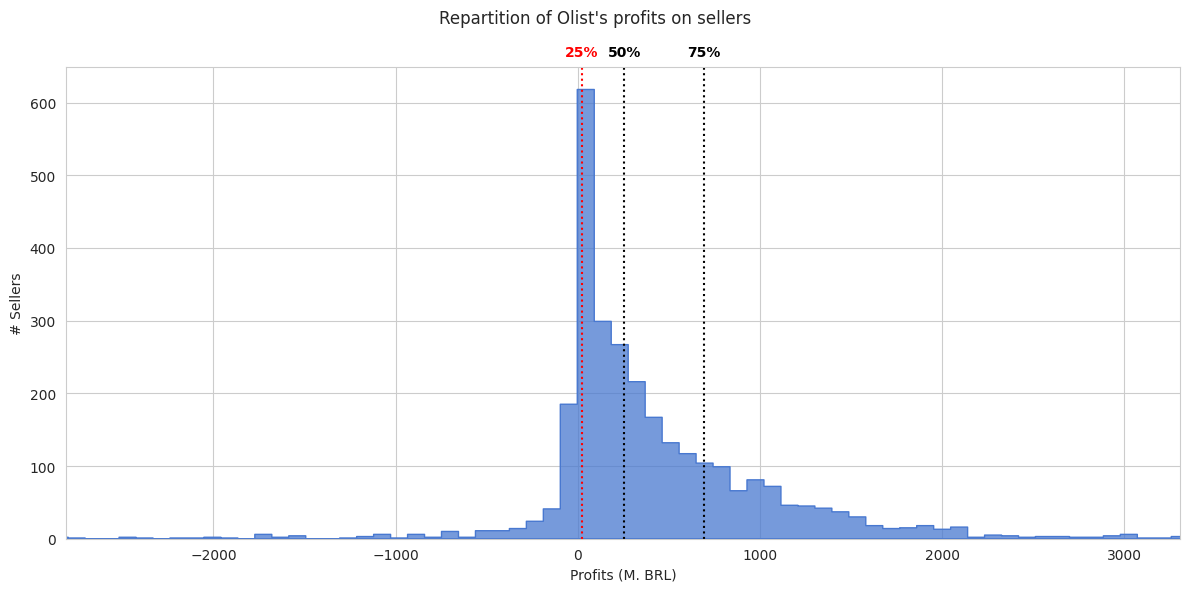

In [101]:
sns.set_palette('muted')

fig, ax = plt.subplots(figsize=(12, 6))

plt.suptitle(t="Repartition of Olist's profits on sellers")

sns.histplot(sellers['profit'],
             stat='count',
             element='step',
             ax=ax)

quantiles = sellers['profit'].quantile(q=[.01, .25, .5, .75, .99])

ax.set_xlim(quantiles.iloc[0], quantiles.iloc[-1])
ax.set_xlabel(xlabel='Profits (M. BRL)')
ax.set_ylabel(ylabel='# Sellers')

for p, q in quantiles.iloc[1:-1].items():
    c_ = 'black'
    if p == .25:
        c_ = 'red'
    ax.axvline(x=q,
               color=c_,
               ls=':')
    ax.text(x=q,
            y=ax.get_yticks()[-1] - 30,
            s=f'{p:.0%}',
            color=c_,
            ha='center',
            va='center',
            weight='bold')

fig.tight_layout();

👆 **Observations:**  
I estimate that removing the **742** sellers (25% of all sellers) that yielded a profit inferior to **20.98** BRL will result in an increased profit.  
The number of sellers to remove for the best outcome shall be further investigated.  
  
**Note:**  
Even more of the low-profit sellers could be considered as **under-performers**, however removing too many from the platform might have a negative impact, as the range and selection of products for sale will be reduced as well.

## 8.3) What-if Analysis

To analyze the impact of removing the worst sellers from Olist's marketplace, I will perform a **what-if analysis**.

🤔 **What could Olist do to increase profits with the information we have now?**  
- Let's see the financial impact of **removing sellers**, starting from the **least profitable ones**
- I **rank** the sellers by **increasing profits**, and estimate the **costs** and **revenues** after removing them from Olist over the past 16 months.

### 8.3.1) Data Preparation

In [102]:
sorted_sellers = sellers.sort_values(by='profit') \
                    [['months_on_olist',
                      'sales',
                      'profit',
                      'revenue',
                      'quantity',
                      'cost_of_reviews']] \
                    .reset_index()

sorted_sellers.head()

,index,months_on_olist,sales,profit,revenue,quantity,cost_of_reviews
0,769,18.0,123304.83,-21519.517,13770.483,2033,35290
1,2358,20.0,200472.92,-17752.708,21647.292,1987,39400
2,1357,19.0,104288.42,-17581.158,11948.842,1775,29530
3,945,12.0,37177.52,-15542.248,4677.752,1203,20220
4,315,10.0,17535.69,-12886.431,2553.569,1018,15440


### 8.3.2) Impact Analaysis

In [103]:
gross_profits_per_seller_removed = profits_gross - np.cumsum(sorted_sellers['profit'][:-1])
review_costs_per_seller_removed = costs_reviews - np.cumsum(sorted_sellers['cost_of_reviews'][:-1])
revenues_per_seller_removed = revenue_total - np.cumsum(sorted_sellers['revenue'][:-1])

### Revenues

In [104]:
fees_per_seller_removed = revenue_sales - np.cumsum(sorted_sellers['sales'][:-1] * .1)
suscriptions_per_seller_removed = revenue_subscription - np.cumsum(sorted_sellers['months_on_olist'][:-1] * 80)

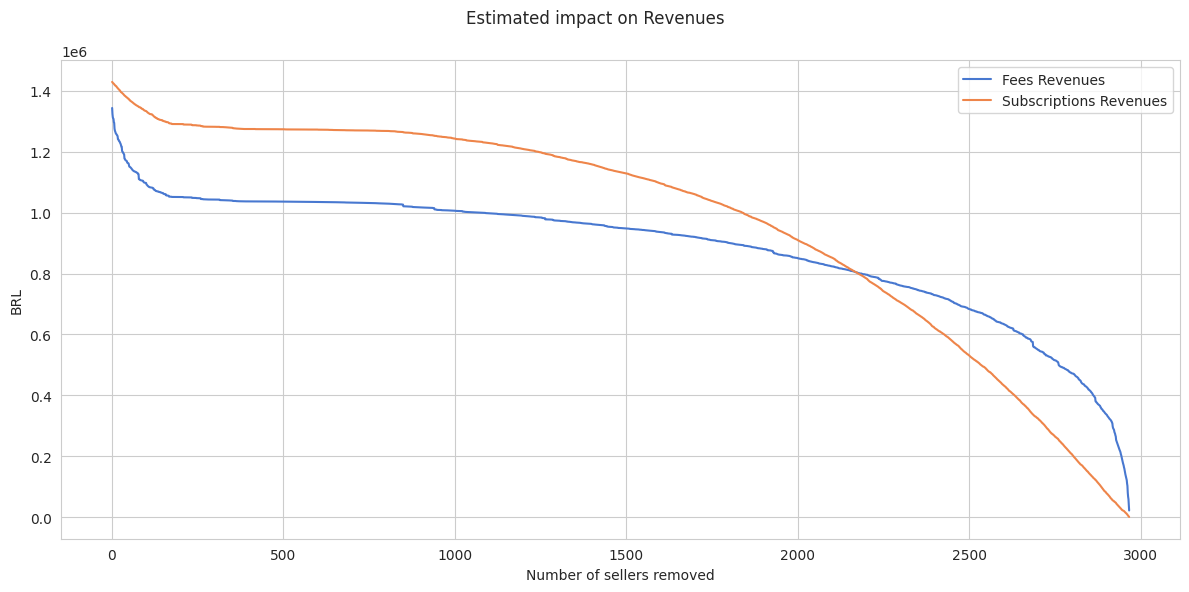

In [105]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(1, n_sellers, 1)

plt.suptitle(t="Estimated impact on Revenues")

profit_line = sns.lineplot(x=x,
                           y=fees_per_seller_removed,
                           label='Fees Revenues',
                           ax=ax)

revenue_line = sns.lineplot(x=x,
                            y=suscriptions_per_seller_removed,
                            label='Subscriptions Revenues',
                            ax=ax)

ax.set_xlabel('Number of sellers removed')
ax.set_ylabel('BRL')

ax.tick_params(axis='y')

ax.legend()

fig.tight_layout();

### Costs

**IT Costs scaling parameters $\alpha$ and $\beta$**

I know that the total IT Costs scale with both the number of sellers (`n_sellers`) and the amount of products they sold (`n_products`)  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$  

- $\alpha = 3157.27$
- $\beta = 978.23$

In [106]:
alpha, beta = 3157.27, 978.23
n_sellers = sellers.shape[0]
n_products = sellers.quantity.sum()

In [107]:
def compute_costs_of_it(n_sellers, n_products):
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_products)

In [108]:
new_n_sellers = n_sellers - np.arange(1, n_sellers, 1)
new_n_products = n_products - np.cumsum(sorted_sellers['quantity'][:-1])

it_costs_per_seller_removed = compute_costs_of_it(new_n_sellers, new_n_products)
review_costs_per_seller_removed = sellers['cost_of_reviews'].sum() - np.cumsum(sorted_sellers['cost_of_reviews'][:-1])

costs_per_seller_removed = it_costs_per_seller_removed + review_costs_per_seller_removed

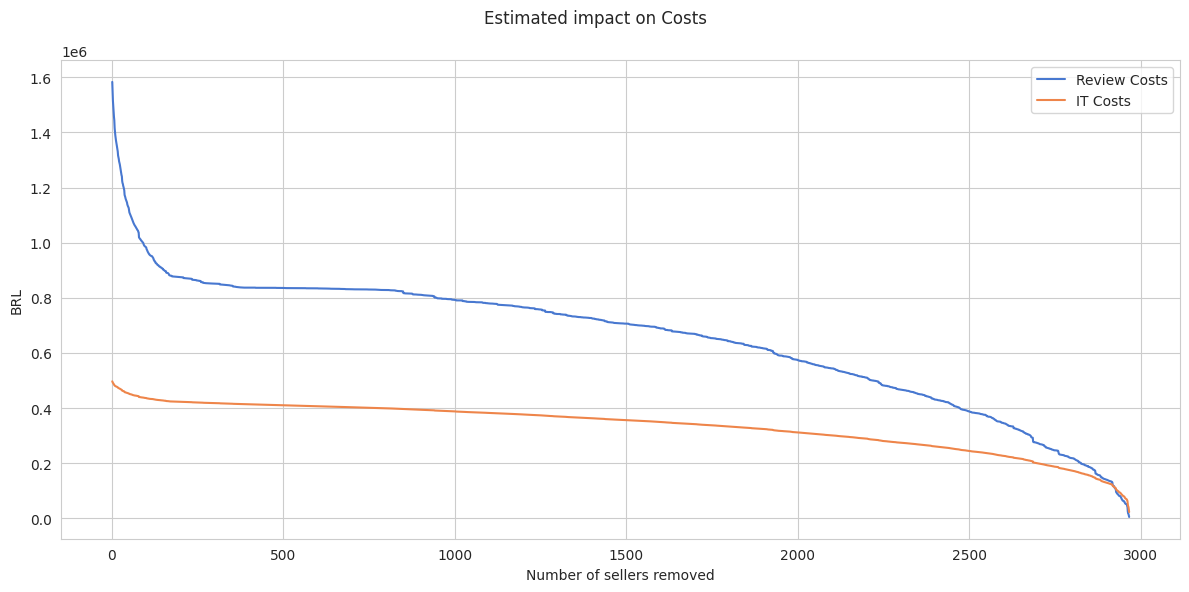

In [109]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(1, n_sellers, 1)

plt.suptitle(t="Estimated impact on Costs")

profit_line = sns.lineplot(x=x,
                           y=review_costs_per_seller_removed,
                           label='Review Costs',
                           ax=ax)

revenue_line = sns.lineplot(x=x,
                            y=it_costs_per_seller_removed,
                            label='IT Costs',
                            ax=ax)

ax.set_xlabel('Number of sellers removed')
ax.set_ylabel('BRL')

ax.tick_params(axis='y')

ax.legend()

fig.tight_layout();

**👆 Removing the least profitable sellers nets a great decrease of the estimated costs of bad reviews**  
**👆 IT Costs seem less relevant to this analysis**

In [110]:
# Computing final metrics (profits and margin, for each scenario)
profits_per_seller_removed = gross_profits_per_seller_removed - it_costs_per_seller_removed
margin_per_seller_removed = profits_per_seller_removed / revenues_per_seller_removed

## 8.4) How many Under-Performers to remove?

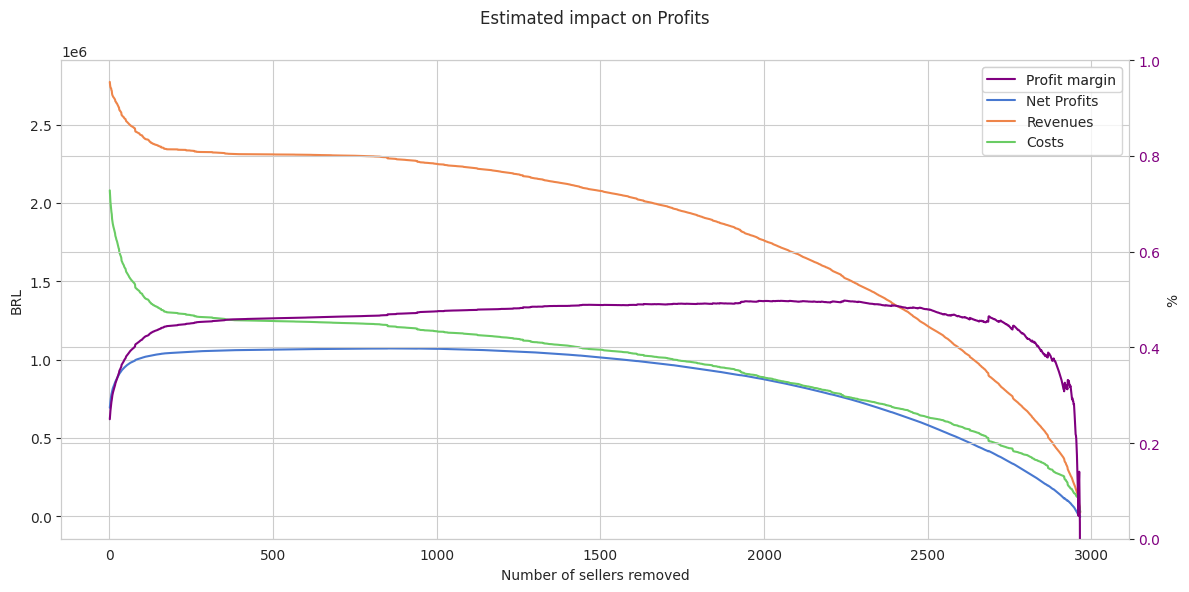

In [111]:
fig, ax = plt.subplots(figsize=(12, 6))

axs = [ax, ax.twinx()]

x = np.arange(1, n_sellers, 1)

plt.suptitle(t="Estimated impact on Profits")

profit_line = sns.lineplot(x=x,
                           y=profits_per_seller_removed,
                           label='Net Profits',
                           ax=axs[0])

revenue_line = sns.lineplot(x=x,
                            y=revenues_per_seller_removed,
                            label='Revenues',
                            ax=axs[0])

costs_line = sns.lineplot(x=x,
                          y=costs_per_seller_removed,
                          label='Costs',
                          ax=axs[0])

axs[0].set_xlabel('Number of sellers removed')
axs[0].set_ylabel('BRL')

axs[0].tick_params(axis='y')

margin_line = sns.lineplot(x=x,
                           y=margin_per_seller_removed,
                           label='Profit margin',
                           color='purple',
                          ax=axs[1])

axs[1].set_ylabel('%')
axs[1].tick_params(axis='y',
                   labelcolor='purple')
axs[1].set(ylim=[0, 1])

lines = [axs[1].lines[0], *axs[0].lines]
labels = [line.get_label() for line in lines]
axs[0].legend(lines, labels)

fig.tight_layout();

In [112]:
# Find optimal number of sellers to remove
print(f"""
📊 Decision thresholds:

👉 Optimizing for profits requires removing {profits_per_seller_removed.argmax()} ({round(profits_per_seller_removed.argmax() / n_sellers * 100, 2)}%) sellers.
👉 Optimizing for profit margin requires removing {margin_per_seller_removed.argmax()} ({round(margin_per_seller_removed.argmax() / n_sellers * 100, 2)}%) sellers.
""")


📊 Decision thresholds:

👉 Optimizing for profits requires removing 854 (28.78%) sellers.
👉 Optimizing for profit margin requires removing 2244 (75.63%) sellers.



# Conclusion

Removing under-performing Sellers will undoubtedly have a positive impact on Olist's profits.  

**A hypothetical example:**  
If Olist would have never let the worst 854 sellers join, which make up almost 29% of the platforms listed vendors, the overall profit from start to finish of the investigated months would have been 160% higher. This is mostly due to repeated negative reviews related to these Sellers.

Theoretically, Olist could remove even more sellers that perform slightly better than the initial 854, but still don't have a very good impact on the businesses performance. However, there is a fine line between trying to optimize profit and cutting off too many vendors and therefore reducing the number of listed products.